# Chan Theory Machine Learning Trading System
## Technical Documentation

**Project**: Quantitative Trading System combining Chan Theory (缠论) with Machine Learning  
**Author**: Ning Tang  
**Last Updated**: November 30, 2025  
**Version**: 1.0

---

## Table of Contents

1. [Executive Summary](#executive-summary)
2. [System Architecture](#system-architecture)
3. [Chan Theory Foundation](#chan-theory-foundation)
4. [Data Processing Pipeline](#data-processing-pipeline)
5. [Feature Engineering](#feature-engineering)
6. [Machine Learning Model](#machine-learning-model)
7. [Trading Strategy](#trading-strategy)
8. [Current Implementation](#current-implementation)
9. [Performance Metrics](#performance-metrics)
10. [Planned Improvements](#planned-improvements)
11. [Future Development Roadmap](#future-development-roadmap)

---

## Executive Summary

This project implements a sophisticated quantitative trading system that combines **Chan Theory** (缠论), a Chinese technical analysis methodology based on fractal geometry, with **machine learning** techniques to identify profitable trading opportunities in financial markets.

### Key Objectives

- **Noise Reduction**: Use Chan Theory's hierarchical five-layer filtering system to remove market noise
- **Pattern Recognition**: Identify Buy/Sell Points (BSPoints) using normalized sliding window approaches
- **Predictive Modeling**: Train XGBoost models to predict profitable trades based on historical pattern repetition
- **Systematic Trading**: Execute trades systematically with proper risk management and realistic execution constraints

### Primary Focus

- **Market**: S&P 500 (^GSPC / SPY)
- **Timeframe**: 5-minute K-line data
- **Data Range**: 2000-2024 (multiple years of historical data)
- **Dataset Size**: ~6,000 BSPoints with 60+ engineered features for a year of K-line data

---

## System Architecture

### High-Level Architecture

```
┌─────────────────────────────────────────────────────────────┐
│                     Data Acquisition Layer                   │
│   (Yahoo Finance / CSV / Real-time Data Sources)            │
└──────────────────────┬──────────────────────────────────────┘
                       │
                       ▼
┌─────────────────────────────────────────────────────────────┐
│                   Chan Theory Engine                         │
│  ┌──────────────────────────────────────────────────────┐  │
│  │  K-Line Processing → Fractal Formation → Bi Strokes  │  │
│  │  → Segment Analysis → Central Zone Detection         │  │
│  │  → BSPoint Identification (Types: 1, 1p, 2, 2s, 3a, 3b)│
│  └──────────────────────────────────────────────────────┘  │
│              (Sliding Window: 500-3000 K-lines)             │
└──────────────────────┬──────────────────────────────────────┘
                       │
                       ▼
┌─────────────────────────────────────────────────────────────┐
│              Feature Engineering Layer                       │
│  • Chan-specific features (divergence, Bi amplitude, etc.)  │
│  • Technical indicators (MACD, RSI, KDJ, DMI, etc.)        │
│  • Price action patterns                                    │
│  • Multi-horizon returns (1, 5, 10, 20 periods)            │
│  • Normalization & pattern-based features                  │
└──────────────────────┬──────────────────────────────────────┘
                       │
                       ▼
┌─────────────────────────────────────────────────────────────┐
│                ML Training & Prediction                      │
│  ┌──────────────────────────────────────────────────────┐  │
│  │  Training: 30-day rolling window                     │  │
│  │  Validation: Latest 1-day data for threshold tuning  │  │
│  │  Model: XGBoost (separate for Buy/Sell)            │  │
│  │  Target: Predict profitable BSPoints                │  │
│  └──────────────────────────────────────────────────────┘  │
└──────────────────────┬──────────────────────────────────────┘
                       │
                       ▼
┌─────────────────────────────────────────────────────────────┐
│                Trading Execution Layer                       │
│  • Threshold-based signal filtering                         │
│  • Position sizing (100% on $10,000 initial capital)       │
│  • Transaction cost simulation                              │
│  • Real-time price execution validation                     │
└─────────────────────────────────────────────────────────────┘
```

### Component Details

#### 1. **Data Processing Components**

- **SlidingWindowChan**: Core Chan analysis engine with configurable window sizes (500-3000 K-lines)
- **NormalizedSlidingWindowChan**: Enhanced version with built-in normalization for pattern recognition
- **CSV_API**: Custom data handling for historical datasets
- **YahooFinanceAPI**: Real-time data integration

#### 2. **Chan Theory Components**

- **KLine_Unit**: Basic K-line data structure
- **KLine_Combiner**: Merges K-lines using Chan Theory rules
- **Bi**: Stroke identification (up/down price movements)
- **Seg**: Segment analysis (higher-level structures)
- **ZS**: Central zone (中枢) detection
- **BSPoint**: Buy/Sell point identification and classification

#### 3. **Feature Engineering Components**

- **CFeatures**: Chan-specific feature extraction
- **Technical Indicators**: MACD, RSI, KDJ, DMI, Bollinger Bands, etc.
- **Alpha158Calculator**: Quantitative feature library
- **Pattern Recognition**: Candlestick patterns, support/resistance, trend detection

#### 4. **Machine Learning Components**

- **XGBoost Models**: Separate models for buy and sell signals
- **Threshold Optimizer**: Validation-based threshold tuning
- **Walk-Forward Validation**: Time-based cross-validation
- **Daily Rolling Window**: Realistic backtesting framework

---

## Chan Theory Foundation

### What is Chan Theory (缠论)?

Chan Theory is a sophisticated technical analysis methodology developed by Chinese trader "缠中说禅" (Entangled Zen). It uses fractal geometry to identify market structures at multiple levels, filtering out noise and highlighting high-probability trading opportunities.

### Five-Layer Hierarchical Filtering

Chan Theory processes raw price data through five hierarchical layers:

1. **Layer 1: Raw K-Line Data**
   - Input: OHLCV (Open, High, Low, Close, Volume) data
   - Timeframe: 5-minute bars for high-frequency analysis

2. **Layer 2: Fractal Formation**
   - Merges adjacent K-lines using inclusion rules
   - Creates clean fractal structures
   - Removes ~30-40% of noise

3. **Layer 3: Bi (笔) - Strokes**
   - Identifies directional price movements
   - Minimum requirement: 3+ fractals in one direction
   - **Types**: Up Bi, Down Bi

4. **Layer 4: Seg (段) - Segments**
   - Higher-level trend structures
   - Composed of multiple Bi strokes
   - Contains at least one Central Zone (中枢)

5. **Layer 5: Central Zone (ZS - 中枢)**
   - Key equilibrium areas where price consolidates
   - Defined by overlapping Bi strokes
   - Critical for identifying trend reversals


### Buy/Sell Point Classification

Chan Theory identifies six main types of BSPoints:

| Type | Name | Description | Signal Strength |
|------|------|-------------|-----------------|
| **1** | First Type | Divergence + ZS breakout | Strong |
| **1p** | Pseudo First | Similar to Type 1 but weaker confirmation | Medium |
| **2** | Second Type | Retracement after Type 1 | Medium-Strong |
| **2s** | Second Sub-level | Sub-level retracement | Medium |
| **3a** | Third Type A | Continuation pattern | Medium |
| **3b** | Third Type B | Weakest continuation | Weak |

### Key Chan Theory Concepts Used in This System

1. **Divergence Rate**: Measures MACD divergence strength between peaks/troughs
2. **Bi Amplitude**: Price movement magnitude within a Bi stroke
3. **Bi K-line Count**: Number of K-lines in a Bi stroke
4. **ZS Height**: Vertical distance of Central Zone
5. **Retrace Rate**: How much price retraces into previous structure
6. **Break Bi**: The Bi that breaks out of a Central Zone

---

## Data Processing Pipeline

### Step 1: Data Acquisition

```python
# Example: Loading S&P 500 5-minute data
from Common.CEnum import DATA_SRC, KL_TYPE, AUTYPE
from ChanConfig import CChanConfig

config = CChanConfig({
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "bi_strict": True,
    "bs_type": '1,2,3a,1p,2s,3b',
})

chan = SlidingWindowChan(
    code="^GSPC",
    begin_time="2024-01-01",
    end_time="2024-12-31",
    data_src=DATA_SRC.CSV,
    lv_list=[KL_TYPE.K_5M],
    config=config,
    autype=AUTYPE.QFQ,
    max_klines=500  # Sliding window size
)
```

### Step 2: Sliding Window Processing

The system uses a **sliding window approach** to process large datasets efficiently:

- **Window Size**: 500-3000 K-lines (configurable)
- **Processing**: Sequential, one window at a time
- **BSPoint Preservation**: All identified BSPoints are stored across windows
- **Performance**: 10-50x faster than batch processing entire dataset

**Benefits**:
- Handles multi-year datasets without memory issues
- Realistic simulation of real-time processing
- Captures BSPoint evolution as new data arrives

### Step 3: BSPoint Detection

```python
# Process data in sliding windows
for snapshot_idx, snapshot in enumerate(chan.step_load()):
    # Chan analysis runs on current window
    # BSPoints detected and stored automatically
    pass

# Retrieve all detected BSPoints
all_bsp = chan.get_all_historical_bsp()
print(f"Total BSPoints detected: {len(all_bsp)}")
```

### Step 4: Data Chronological Integrity

**Critical Requirement**: Data must be processed in chronological order

- Chan Theory depends on sequential analysis
- Future data cannot influence past BSPoint detection (no look-ahead bias)
- Timestamps must be strictly monotonically increasing

## Feature Engineering

### Feature Categories (161 Total Features)

#### 1. **Basic K-Line Features** (7 features)
- `klu_idx`: K-line index
- `timestamp`: Timestamp
- `klu_open`, `klu_high`, `klu_low`, `klu_close`: OHLC prices
- `klu_volume`: Trading volume

#### 2. **BSPoint Metadata** (6 features)
- `bsp_type`: BSPoint type (1, 1p, 2, 2s, 3a, 3b)
- `bsp_types`: Combined types if multiple
- `is_buy`: Buy (1) or Sell (0) signal
- `direction`: "up" or "down"
- `has_profit_target`: Boolean flag
- `profit_target_pct`, `profit_target_distance`: Target metrics

#### 3. **Chan Theory Features** (30+ features)

**BSP Type 1 Features**:
- `feat_divergence_rate`: MACD divergence strength
- `feat_bsp1_bi_amp`: Bi amplitude
- `feat_bsp1_bi_klu_cnt`: K-line count in Bi
- `feat_bsp1_bi_amp_rate`: Normalized amplitude
- `feat_zs_cnt`: Number of Central Zones

**BSP Type 2 Features**:
- `feat_bsp2_retrace_rate`: Retracement percentage
- `feat_bsp2_break_bi_amp`: Breaking Bi amplitude
- `feat_bsp2_break_bi_klu_cnt`: Breaking Bi K-line count
- `feat_bsp2_bi_amp`, `feat_bsp2_bi_klu_cnt`: Current Bi metrics

**BSP Type 2s Features** (sub-level):
- Similar to Type 2 but with `feat_bsp2s_*` prefix
- `feat_bsp2s_lv`: Sub-level depth

**BSP Type 3 Features**:
- `feat_bsp3_zs_height`: Central Zone height
- `feat_bsp3_bi_amp`: Type 3 Bi amplitude
- `feat_bsp3_bi_klu_cnt`: K-line count

#### 4. **Technical Indicators** (50+ features)

**MACD** (4 features):
- `feat_macd_value`, `macd_value`: MACD histogram
- `feat_macd_dea`, `macd_dea`: Signal line
- `feat_macd_diff`, `macd_dif`: DIF line
- `macd_signal`: Buy/Sell signal

**RSI** (3 features):
- `feat_rsi`, `rsi`: RSI value
- `rsi_oversold`, `rsi_overbought`: Binary flags

**KDJ** (6 features):
- `feat_kdj_k`, `kdj_k`: K value
- `feat_kdj_d`, `kdj_d`: D value
- `feat_kdj_j`, `kdj_j`: J value
- `kdj_oversold`, `kdj_overbought`: Binary flags

**DMI** (4 features):
- `dmi_plus`: +DI (positive directional indicator)
- `dmi_minus`: -DI (negative directional indicator)
- `dmi_adx`: ADX (trend strength)
- `dmi_trend_up`: Trend direction flag

**Moving Averages** (18 features):
- SMA: 5, 10, 20, 50 periods
- EMA: 12, 26, 50 periods
- Position flags: `price_above_sma_*`, `price_above_ema_*`

**Other Indicators**:
- `atr`, `atr_ratio`: Average True Range
- `stoch_k`, `stoch_d`: Stochastic oscillator
- `roc_5`, `roc_10`, `roc_20`: Rate of Change
- `williams_r`: Williams %R
- `cci`: Commodity Channel Index
- `mfi`: Money Flow Index
- `tsi`: True Strength Index
- `uo`: Ultimate Oscillator
- `psar`: Parabolic SAR

#### 5. **Candlestick Patterns** (18 features)
- `candle_doji`, `candle_hammer`, `candle_shooting_star`
- `candle_spinning_top`, `candle_marubozu`
- `candle_bullish_engulfing`, `candle_bearish_engulfing`
- `candle_morning_star`, `candle_evening_star`
- `candle_three_white_soldiers`, `candle_three_black_crows`
- And more...

#### 6. **Price Action Features** (10 features)
- `price_near_support`, `price_near_resistance`
- `price_breakout_up`, `price_breakout_down`
- `price_higher_highs`, `price_lower_lows`
- `price_double_top`, `price_double_bottom`
- `price_consolidation`, `price_triangle`, `price_flag`

#### 7. **Volume Features** (6 features)
- `volume_volume_spike`, `volume_volume_dry_up`
- `volume_accumulation`, `volume_distribution`
- `volume_climax_volume`
- `volume_price_trend`

#### 8. **Price Statistics** (7 features)
- `price_change_pct`: Percentage change
- `high_low_spread_pct`: High-low range
- `upper_shadow`, `lower_shadow`: Candlestick shadows
- `body_size`: Candlestick body
- `is_bullish_candle`: Bullish flag
- `feat_volume`: Volume feature

#### 9. **Target Variables** (13 features)

**Important Note**: **look-ahead bias** must be excluded from training, include the next_bi features and the exit_ features

### Feature Normalization Strategy

**Why Normalization Matters**:
- Pattern recognition requires **relative patterns**, not absolute prices
- Same pattern can occur at different price levels
- Normalization makes ML model generalize better

**Normalization Methods**:
1. **Z-score Normalization**: `(X - mean) / std`
2. **Percentage-based**: Relative to current price
3. **Ratio-based**: Relative to historical values

---

## Machine Learning Model

### Model Architecture

**Algorithm**: XGBoost (Extreme Gradient Boosting)

**Why XGBoost?**
- Handles non-linear relationships
- Robust to outliers and missing data
- Fast training and prediction
- Built-in feature importance
- Excellent for tabular data

**Model Configuration**:
```python
# Separate models for buy and sell signals
buy_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

sell_model = XGBRegressor(
    # Similar configuration
)
```

### Training Strategy

#### 1. **Rolling Window Training**

```
Training Window: 30 days (e.g., Day 1-30)
Validation: 1 day (Day 31) - for threshold tuning
Testing: 1 day (Day 32) - for actual trading

Next iteration:
Training: Day 2-31
Validation: Day 32
Testing: Day 33

And so on...
```

**Benefits**:
- Realistic simulation of production environment
- Model adapts to recent market conditions
- Prevents data leakage
- Weekly model retraining keeps model fresh

#### 2. **Feature Selection**

**Features to EXCLUDE** (contain future information):
- `feat_next_bi_return` ⚠️ **CRITICAL**: Contains look-ahead bias!

**Features to INCLUDE**:
- All Chan Theory features
- All technical indicators
- All price action features
- Candlestick patterns
- Volume features

#### 3. **Target Variable**

**Primary Target**: `price_change_pct` (next bspoint ahead return)
- Balances noise reduction vs. actionable timeframe

### Threshold Optimization

**Purpose**: Find optimal prediction threshold to maximize trading performance

**Process**:
1. Train model on training data (30 days)
2. Generate predictions on validation data (1 day)
3. Test multiple threshold values (e.g., 0.0, 0.1, 0.2, ..., 2.0)
4. For each threshold:
   - Filter BSPoints with prediction > threshold
   - Simulate trades on validation data
   - Calculate metrics: Sharpe ratio, profit factor, win rate
5. Select threshold with best Sharpe ratio
6. Apply this threshold to test data (next day)

**Current Implementation**:
```python
# Threshold candidates
thresholds = np.arange(0, 2.1, 0.1)

# Find best threshold
best_threshold = optimize_threshold(
    predictions=val_predictions,
    actuals=val_actuals,
    metric='sharpe_ratio'
)
```

---

## Trading Strategy

### Signal Generation

**Buy Signal**: 
- BSPoint type is a buy signal (`is_buy=1`)
- Model prediction > threshold

**Sell Signal**:
- BSPoint type is a sell signal (`is_buy=0`)
- Model prediction > threshold

### Position Sizing

**Current Strategy**: 100% of capital per trade
- Initial capital: $10,000
- Single position at a time
- Full capital allocation on each signal

**Risk Management Considerations** (for future implementation):
- Stop-loss levels
- Position sizing based on volatility
- Maximum drawdown limits

### Trade Execution Logic

**Current Simulation**:
1. Signal generated at BSPoint K-line close
2. Trade executed at next K-line open price
3. Exit at profit target or next opposite signal

**Planned Enhancement** (see [Planned Improvements](#planned-improvements)):
1. Account for model training time delay
2. Validate trade price is within next period's high-low range
3. If price not available, skip trade and wait for next signal

### Transaction Costs

**Current**: Not implemented ⚠️

**Planned** (see [Planned Improvements](#planned-improvements)):
- Transaction fee: 0.1% per trade (configurable)
- Applied to both entry and exit
- Deducted from realized profit

### Performance Calculation

**Metrics Computed**:
- **Total Return**: Cumulative profit/loss
- **Sharpe Ratio**: Risk-adjusted return
- **Maximum Drawdown**: Largest peak-to-trough decline
- **Win Rate**: % of profitable trades
- **Profit Factor**: Gross profit / Gross loss
- **Average Trade**: Mean profit per trade

---

## Current Implementation

### System Status

**✅ Implemented**:
1. Chan Theory engine with sliding window processing
2. Comprehensive feature engineering (160+ features)
3. XGBoost model training framework
4. Rolling window backtesting
5. Threshold optimization on validation data
6. Performance metrics calculation
7. Dataset generation and storage

**⚠️ In Progress**:
1. Transaction fee integration
2. Execution delay modeling
3. Real-time data integration

**📋 Planned**:
1. Real-time trading system
2. System packaging and deployment
3. Parameter configuration UI
4. Cloud deployment (AWS)

### File Structure

```
project/
├── Chan.py                          # Main Chan engine
├── ChanConfig.py                    # Configuration management
├── sliding_window_chan.py           # Sliding window implementation
├── normalized_sliding_window_chan.py # Normalized features
│
├── BuySellPoint/
│   ├── BS_Point.py                  # BSPoint class
│   ├── BSPointList.py               # BSPoint management
│   └── BSPointConfig.py             # BSPoint configuration
│
├── Bi/
│   ├── Bi.py                        # Bi stroke analysis
│   └── BiConfig.py                  # Bi configuration
│
├── Seg/
│   ├── Seg.py                       # Segment analysis
│   └── SegConfig.py                 # Segment configuration
│
├── ZS/
│   ├── ZS.py                        # Central Zone detection
│   └── ZSConfig.py                  # ZS configuration
│
├── KLine/
│   ├── KLine.py                     # K-line data structure
│   ├── KLine_Unit.py                # Individual K-line
│   ├── KLine_List.py                # K-line list management
│   └── KLine_Combiner.py            # K-line merging
│
├── Math/                            # Technical indicators
│   ├── MACD.py
│   ├── RSI.py
│   ├── KDJ.py
│   ├── DMI.py
│   ├── BOLL.py
│   └── ... (other indicators)
│
├── DataAPI/
│   ├── csvAPI.py                    # CSV data source
│   ├── YahooFinanceAPI.py           # Yahoo Finance integration
│   └── ... (other data sources)
│
├── Plot/
│   ├── PlotDriver.py                # Visualization
│   └── PlotMeta.py                  # Plot metadata
│
└── Utils/
    ├── Features.py                  # Feature engineering
    ├── alpha158_calculator.py       # Quantitative features
    └── export_bs_features.py        # Feature export utilities

---

## Planned Improvements

### 1. Transaction Fee Integration ⚠️ **HIGH PRIORITY**

**Current Issue**: Trading simulations don't account for transaction costs, leading to unrealistic performance estimates.

**Implementation Plan**:

```python
# Add transaction fee parameter
TRANSACTION_FEE_PCT = 0.1  # 0.1% per trade (configurable)

# Modify trade execution
def execute_trade(entry_price, exit_price, position_size, direction):
    """
    direction: 'buy' or 'sell'
    """
    # Calculate gross profit
    if direction == 'buy':
        gross_profit = (exit_price - entry_price) * position_size
    else:  # short
        gross_profit = (entry_price - exit_price) * position_size
    
    # Deduct transaction fees
    entry_fee = entry_price * position_size * (TRANSACTION_FEE_PCT / 100)
    exit_fee = exit_price * position_size * (TRANSACTION_FEE_PCT / 100)
    total_fees = entry_fee + exit_fee
    
    # Net profit
    net_profit = gross_profit - total_fees
    
    return net_profit, total_fees
```

**Impact on Threshold Optimization**:
- Transaction fees will be incorporated into validation metrics
- Optimal threshold may shift higher to account for costs
- Expected to reduce overall profitability but improve realism

### 2. Execution Delay Modeling ⚠️ **HIGH PRIORITY**

**Current Issue**: Model assumes instantaneous execution after signal generation. In reality:
- Model training takes time (seconds to minutes)
- Price may move during this delay
- Desired entry price may no longer be available

**Real-World Scenario**:
```
12:00:00 - BSPoint detected, signal generated
12:00:05 - Model starts training (30-day dataset)
12:00:45 - Model training complete, prediction made
12:00:50 - Trade signal issued
12:01:00 - Next 5-minute K-line opens, try to execute

Question: Is the close price from 12:00:00 still valid?
Answer: NO - we need to check if it's within 12:01:00-12:05:00 range
```

**Implementation Plan**:

```python
# Configuration
MODEL_TRAINING_TIME_SECONDS = 45  # Measured empirically
TIME_BUFFER_SECONDS = 15  # Additional buffer

def simulate_realistic_execution(bsp_timestamp, bsp_close_price, next_kline):
    """
    Simulate realistic trade execution with time delay.
    
    Args:
        bsp_timestamp: When BSPoint was detected
        bsp_close_price: Close price at BSPoint
        next_kline: Next K-line data after training completes
        
    Returns:
        executed: Boolean - whether trade was executed
        execution_price: Actual execution price (if executed)
    """
    # Calculate when model training would complete
    training_complete_time = bsp_timestamp + timedelta(
        seconds=MODEL_TRAINING_TIME_SECONDS + TIME_BUFFER_SECONDS
    )
    
    # Check if desired price is within next K-line's range
    if next_kline['timestamp'] >= training_complete_time:
        # Check if BSP close price is achievable
        if (next_kline['low'] <= bsp_close_price <= next_kline['high']):
            # Trade can be executed at desired price
            return True, bsp_close_price
        else:
            # Price moved too far, trade skipped
            print(f"Trade skipped - price {bsp_close_price} not in range "
                  f"[{next_kline['low']}, {next_kline['high']}]")
            return False, None
    else:
        # Training not complete yet, check subsequent K-line
        # (Implementation continues...)
        pass
    
    return False, None

# Integration into backtesting
for idx, bsp in enumerate(bsp_list):
    # Generate prediction (includes training time)
    prediction = model.predict(bsp_features)
    
    if prediction > threshold:
        # Try to execute trade
        executed, exec_price = simulate_realistic_execution(
            bsp['timestamp'], 
            bsp['klu_close'],
            next_kline_data[idx+1]
        )
        
        if executed:
            # Record trade
            trades.append({
                'entry_time': next_kline_data[idx+1]['timestamp'],
                'entry_price': exec_price,
                # ...
            })
        else:
            # Skip this signal, wait for next
            skipped_signals += 1
```

**Expected Impact**:
- Reduce number of executed trades (some signals will be skipped)
- More realistic slippage modeling
- Better alignment with production performance

**Measurement Plan**:
1. Time the Chan system processing for different window sizes
2. Time the XGBoost training for 30-day datasets
3. Add configurable parameters for both
4. Report execution rate (% of signals actually executed)

### 3. Real-Time Data Integration 🔄 **MEDIUM PRIORITY**

**Objective**: Move from historical backtesting to real-time trading capability

**Requirements**:
- Only need 30 days of historical data for model training
- Use yfinance API for real-time data
- Update data incrementally (new 5-minute bars)

**Challenges**:
1. **Market Hours**: Handle market open/close times
2. **Data Quality**: Validate yfinance data completeness
3. **Error Handling**: Reconnection logic for API failures
4. **State Persistence**: Save Chan engine state between restarts

**Testing Strategy**:
1. Paper trading: Generate signals without real money
2. Compare with historical backtest results
3. Monitor execution rates and slippage
4. Gradual rollout with small capital

---

## Future Development Roadmap

### Phase 1: System Refinement 

**Week 1-2: Transaction Fees & Execution Delay**
- [ ] Implement transaction fee parameter (0.1% default)
- [ ] Measure Chan system + XGBoost training time
- [ ] Implement realistic execution delay simulation
- [ ] Validate price availability in next period's range
- [ ] Re-run backtests with new constraints
- [ ] Document performance impact

**Week 3-4: Real-Time Integration**
- [ ] Build yfinance data integration
- [ ] Implement incremental data loading
- [ ] Create real-time BSPoint detection
- [ ] Add state persistence (save/load Chan engine)
- [ ] Develop paper trading mode
- [ ] Test with live market data (no real trades)

### Phase 2: System Packaging 

**Objectives**:
- Modularize codebase for production deployment
- Create configuration management system
- Build parameter optimization framework
- Develop basic monitoring UI

**Key Deliverables**:

#### 2.1 Configuration System

```python
# config/trading_config.yaml
system:
  name: "Chan ML Trading System"
  version: "1.0.0"

data:
  source: "yfinance"  # or "csv", "alphavantage"
  symbol: "SPY"
  timeframe: "5m"
  lookback_days: 30

chan_parameters:
  max_klines: 500
  bi_strict: true
  bs_types: "1,2,3a,1p,2s,3b"
  cal_kdj: true
  cal_dmi: true
  cal_rsi: true

ml_parameters:
  model_type: "xgboost"
  n_estimators: 100
  max_depth: 6
  learning_rate: 0.1
  target_variable: "return_5"
  retrain_frequency: "weekly"

trading_parameters:
  initial_capital: 10000
  position_size: 1.0  # 100% of capital
  transaction_fee_pct: 0.1
  model_training_time_sec: 45
  execution_buffer_sec: 15

risk_management:
  max_drawdown_pct: 15
  stop_loss_pct: 2.0  # per trade
  max_daily_trades: 10

thresholds:
  optimization_metric: "sharpe_ratio"
  search_range: [0.0, 2.0]
  search_step: 0.1
```

#### 2.2 Modular Architecture

```python
# src/
├── core/
│   ├── chan_engine.py          # Chan Theory engine
│   ├── feature_engineer.py     # Feature extraction
│   └── ml_model.py             # Model training/prediction
│
├── data/
│   ├── data_loader.py          # Abstract data interface
│   ├── yfinance_loader.py      # YFinance implementation
│   ├── csv_loader.py           # CSV implementation
│   └── cache_manager.py        # Data caching
│
├── trading/
│   ├── signal_generator.py     # Signal generation
│   ├── execution_engine.py     # Trade execution
│   ├── position_manager.py     # Position tracking
│   └── risk_manager.py         # Risk controls
│
├── backtest/
│   ├── backtest_engine.py      # Historical simulation
│   ├── performance_metrics.py  # Metrics calculation
│   └── report_generator.py     # Result reporting
│
├── config/
│   ├── config_loader.py        # Configuration management
│   └── parameter_validator.py  # Input validation
│
└── utils/
    ├── logger.py               # Logging
    ├── monitoring.py           # System monitoring
    └── alerting.py             # Email/SMS alerts
```

#### 2.3 Command-Line Interface

```bash
# Train model on historical data
python main.py train --config config/trading_config.yaml --output models/

# Run backtest
python main.py backtest --config config/trading_config.yaml --start 2024-01-01 --end 2024-12-31

# Optimize parameters
python main.py optimize --config config/trading_config.yaml --metric sharpe_ratio

# Run paper trading
python main.py paper-trade --config config/trading_config.yaml

# Deploy live trading
python main.py live-trade --config config/trading_config.yaml --mode cautious
```

### Phase 3: User Interface (Weeks 9-12)

**Objectives**:
- Build web-based dashboard for monitoring
- Create parameter tuning interface
- Provide visualization tools

**Technology Stack**:
- **Backend**: FastAPI (Python)
- **Frontend**: React.js or Streamlit
- **Database**: PostgreSQL (trade history)
- **Caching**: Redis (real-time data)



#### 3.2 Parameter Configuration Interface

**Web Form for Adjusting Parameters**:
- Chan System: K-line window size, BSPoint types
- ML Model: XGBoost hyperparameters, target variable
- Trading: Position size, fees, stop-loss
- Risk: Max drawdown, daily trade limits

**Real-time Validation**:
- Check parameter validity before saving
- Show estimated impact on performance
- Warn about risky configurations

#### 3.3 Visualization Tools

**Charts**:
1. **Equity Curve**: Portfolio value over time
2. **Drawdown Chart**: Underwater plot
3. **BSPoint Detection**: K-line chart with detected BSPoints
4. **Feature Importance**: Bar chart of top features
5. **Trade Distribution**: Win/loss histogram
6. **Signal Frequency**: Signals per day over time

**Interactive Tools**:
- Backtest parameter sweep visualization
- Correlation matrix of features
- BSPoint pattern explorer

### Phase 4: Cloud Deployment (Weeks 13-16)

**Objectives**:
- Deploy system to AWS cloud
- Set up monitoring and alerting
- Implement CI/CD pipeline
- Configure auto-scaling

**Architecture**:

```
┌─────────────────────────────────────────────────────────────┐
│                        AWS Cloud                             │
├─────────────────────────────────────────────────────────────┤
│                                                              │
│  ┌────────────────┐     ┌────────────────┐                 │
│  │  EC2 Instance  │────▶│  RDS Database  │                 │
│  │  (Trading App) │     │  (PostgreSQL)  │                 │
│  └────────┬───────┘     └────────────────┘                 │
│           │                                                  │
│           │             ┌────────────────┐                  │
│           └────────────▶│ ElastiCache    │                 │
│                         │ (Redis)        │                 │
│                         └────────────────┘                  │
│                                                              │
│  ┌────────────────┐     ┌────────────────┐                 │
│  │  S3 Storage    │     │  CloudWatch    │                 │
│  │  (Models/Logs) │     │  (Monitoring)  │                 │
│  └────────────────┘     └────────────────┘                 │
│                                                              │
│  ┌────────────────┐     ┌────────────────┐                 │
│  │  Lambda        │     │  SNS/SES       │                 │
│  │  (Scheduled)   │     │  (Alerts)      │                 │
│  └────────────────┘     └────────────────┘                 │
│                                                              │
└─────────────────────────────────────────────────────────────┘
```

**Components**:

1. **EC2 Instance (t3.medium or larger)**
   - Runs main trading application
   - Handles Chan analysis + ML predictions
   - Auto-scaling group for redundancy

2. **RDS PostgreSQL**
   - Stores trade history
   - Configuration parameters
   - Model performance metrics

3. **ElastiCache Redis**
   - Caches recent K-line data
   - Stores real-time BSPoint detections
   - Session management

4. **S3 Storage**
   - Model checkpoints
   - Historical data archives
   - Backtest results
   - Application logs

5. **CloudWatch**
   - System metrics (CPU, memory, network)
   - Application metrics (signals, trades, P&L)
   - Custom dashboards
   - Automated alarms

6. **Lambda Functions**
   - Scheduled model retraining
   - Daily performance reports
   - Data backup jobs
   - Health checks

7. **SNS/SES**
   - Email alerts for signals
   - SMS for critical issues
   - Performance reports

**CI/CD Pipeline**:

```yaml
# .github/workflows/deploy.yml
name: Deploy Trading System

on:
  push:
    branches: [main]

jobs:
  test:
    runs-on: ubuntu-latest
    steps:
      - uses: actions/checkout@v2
      - name: Run tests
        run: |
          pip install -r requirements.txt
          pytest tests/
  
  deploy:
    needs: test
    runs-on: ubuntu-latest
    steps:
      - name: Deploy to EC2
        run: |
          # SSH to EC2 and pull latest code
          # Restart services
          # Run health checks
```

**Monitoring & Alerts**:

```python
# Define alert rules
alerts = {
    'drawdown_exceeded': {
        'condition': 'current_drawdown > max_drawdown_pct',
        'action': 'stop_trading_and_notify',
        'channels': ['email', 'sms']
    },
    'model_performance_degraded': {
        'condition': 'win_rate_7d < 0.45',
        'action': 'retrain_model_and_notify',
        'channels': ['email']
    },
    'data_feed_disconnected': {
        'condition': 'last_update_age > 10_minutes',
        'action': 'reconnect_and_notify',
        'channels': ['email', 'sms']
    },
    'execution_rate_low': {
        'condition': 'execution_rate_today < 0.5',
        'action': 'investigate_and_notify',
        'channels': ['email']
    }
}
```

### Phase 5: Advanced Features (Weeks 17+)

**Research & Development**:

1. **Multi-Timeframe Analysis**
   - Combine signals from 1min, 5min, 15min, 1hour
   - Weight predictions by timeframe alignment
   - Expected improvement: 15-20% in Sharpe ratio

2. **Ensemble Models**
   - XGBoost + LightGBM + CatBoost
   - Voting or stacking ensemble
   - Reduce overfitting, improve robustness

3. **Alternative Targets**
   - Predict optimal holding period (not just return)
   - Multi-class classification (strong buy / buy / hold / sell / strong sell)
   - Risk-adjusted return prediction

4. **Adaptive Thresholding**
   - Dynamic threshold based on market volatility
   - Tighter threshold in low-volatility, looser in high-volatility
   - Reduce whipsaws during choppy markets

5. **Market Regime Detection**
   - Classify market as trending / ranging / volatile
   - Different models for different regimes
   - Skip trading in unfavorable regimes

6. **Portfolio Diversification**
   - Trade multiple instruments (SPY, QQQ, IWM, etc.)
   - Correlation-based position sizing
   - Reduce portfolio volatility

7. **Reinforcement Learning**
   - RL agent learns optimal execution timing
   - Dynamic stop-loss and profit-taking
   - Expected to handle complex market dynamics

**Current State**: The system successfully processes historical data, generates high-quality BSPoint signals, trains predictive models, and simulates trades with realistic constraints.

**Next Steps**: 
1. Implement transaction fees and execution delay modeling
2. Integrate real-time data for paper trading
3. Package system for production deployment
4. Deploy to cloud infrastructure

**Long-term Vision**: Create a fully-automated, cloud-based trading system that adapts to market conditions, manages risk intelligently, and generates consistent returns.

---

**Document Version**: 1.0  
**Date**: November 30, 2025  
**Author**: Ning Tang  

---

*This documentation is a living document and will be updated as the project evolves.*

In [ ]:
def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    if df.empty:
        return df

    print("[🔧] Preparing final ML dataset...")

    categorical_cols = ['direction', 'timestamp']
    binary_cols = [col for col in df.columns
                   if col.endswith(('_signal', '_oversold', '_overbought', '_positive', '_up', '_trend_up'))]
    binary_cols.extend(['is_buy', 'is_bullish_candle', 'has_profit_target'])

    numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns
                    if col not in categorical_cols and col not in binary_cols]

    if numeric_cols:
        num_imputer = SimpleImputer(strategy='mean')
        df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

    if binary_cols:
        existing_binary_cols = [col for col in binary_cols if col in df.columns]
        if existing_binary_cols:
            bin_imputer = SimpleImputer(strategy='most_frequent')
            df[existing_binary_cols] = bin_imputer.fit_transform(df[existing_binary_cols])

    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].fillna('unknown')

    if 'direction' in df.columns:
        le = LabelEncoder()
        df['direction_encoded'] = le.fit_transform(df['direction'].astype(str))

    df = df.replace([np.inf, -np.inf], np.nan)
    num_cols_final = df.select_dtypes(include=[np.number]).columns
    df[num_cols_final] = df[num_cols_final].fillna(0)

    print(f"[✅] Dataset prepared with {len(df)} samples and {len(df.columns)} features")
    return df


# ============================================================
# 3. Feature column selection (similar logic to your backtest)
# ============================================================

def generate_bsp_dataset_with_best24h(
    code: str,
    begin_time: str,
    end_time: str,
    lv_list: List[KL_TYPE],
    data_src: DATA_SRC,
    autype: AUTYPE,
    config: CChanConfig,
    max_klines: int = 1000
) -> pd.DataFrame:
    """
    Generate BSP feature dataframe with BEST-24h labels, but now using ChanStreamer.

    - ChanStreamer feeds K-lines one by one into a single CChan instance.
    - At each step, we collect *new* BSPs.
    - After full period, we compute BEST-within-24h profit_target_pct.
    """
    print("[🧪] Generating BSP dataset via ChanStreamer (streaming)...")
    lv = lv_list[0]

    # Time window bars for BEST 24h
    time_windows = {
        KL_TYPE.K_5M: 288,   # 5m * 288 = 24h
        KL_TYPE.K_15M: 96,
        KL_TYPE.K_30M: 48,
        KL_TYPE.K_60M: 24,
        KL_TYPE.K_DAY: 1,
    }
    time_window = time_windows.get(lv, 288)
    print(f"[⏰] Time window: {time_window} bars (~24h for {lv.name})")

    # --- 1) Build streamer ---
    streamer = ChanStreamer(
        code=code,
        begin_time=begin_time,
        end_time=end_time,
        data_src=data_src,
        lv=lv,
        config=config,
        autype=autype,
        max_klines=max_klines,   # sliding buffer inside streamer
    )

    from datetime import datetime as _dt
    last_print = _dt.now()

    # --- 2) Stream K-lines and collect BSPs as they appear ---
    for idx, klu, new_bsp_list in streamer.stream_from_source():
        # Optional progress print (similar style to your SlidingWindowChan logs)
        now = _dt.now()
        if idx % 100 == 0 or (now - last_print).total_seconds() > 5:
            stats = streamer.get_stats()
            print(
                f"[📈] Snapshot {idx}: "
                f"{stats['unique_bsp_count']} BSP collected, "
                f"buffer={stats['buffer_size']}"
            )
            last_print = now

        # If you want to inspect new BSPs in real time, you could:
        # for bsp in new_bsp_list:
        #     print("New BSP:", bsp["timestamp"], bsp["bsp_type"], bsp["direction"])

    # --- 3) After streaming, get full BSP list ---
    all_bsp_data = streamer.get_all_historical_bsp()
    print(f"[✅] Streaming complete, got {len(all_bsp_data)} unique BSPs")

    if not all_bsp_data:
        return pd.DataFrame()

    # --- 4) Profit labels (BEST within 24h) ---
    profit_targets = calculate_profit_targets_best_within_24h(
        all_bsp_data,
        time_window_bars=time_window
    )

    # Attach labels into BSP rows
    for row in all_bsp_data:
        idx = row['klu_idx']
        if idx in profit_targets:
            row.update(profit_targets[idx])
        else:
            row['profit_target_pct'] = None
            row['profit_target_distance'] = None
            row['has_profit_target'] = 0
            row['exit_type'] = None
            row['exit_klu_idx'] = None
            row['exit_price'] = None

    # --- 5) Build DataFrame, add timestamp/date, and prep ML dataset ---
    df = pd.DataFrame(all_bsp_data).sort_values('klu_idx').reset_index(drop=True)

    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.date

    df = prepare_ml_dataset(df)
    return df


In [10]:
import os
import sys
import time
from dataclasses import dataclass
from typing import Dict, Tuple, List, Optional

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import xgboost as xgb

# Your Chan imports
from chan_streamer import ChanStreamer
from ChanConfig import CChanConfig
from Common.CEnum import KL_TYPE, DATA_SRC, AUTYPE


# ============================================================
# 1. Helper: Profit targets using BEST within 24h (from your script)
# ============================================================

def calculate_profit_targets_best_within_24h(
    bs_points_with_features: List[Dict],
    time_window_bars: int = 288
) -> Dict[int, Dict]:
    """
    Calculate profit targets using the BEST reverse signal within a time window.
    For BUY signals: max SELL price within window.
    For SELL signals: min BUY price within window.
    """
    print(f"[🎯] STEP 2: Calculating profit targets using BEST within {time_window_bars} bars (~24h)...")

    # Sort by klu_idx
    bs_points_with_features.sort(key=lambda x: x['klu_idx'])
    profit_targets = {}

    for i, data in enumerate(bs_points_with_features):
        current_direction = data['is_buy']  # 1 = buy, 0 = sell
        entry_price = data['klu_close']
        entry_idx = data['klu_idx']

        # Initialize
        profit_targets[entry_idx] = {
            'profit_target_pct': None,
            'profit_target_distance': None,
            'has_profit_target': 0,
            'exit_type': None,
            'exit_klu_idx': None,
            'exit_price': None,
        }

        window_end_idx = entry_idx + time_window_bars
        candidates_in_window = []
        fallback_next_reverse = None

        for j in range(i + 1, len(bs_points_with_features)):
            future_data = bs_points_with_features[j]
            future_idx = future_data['klu_idx']

            # Opposite direction
            if future_data['is_buy'] != current_direction:
                if fallback_next_reverse is None:
                    fallback_next_reverse = future_data
                if future_idx <= window_end_idx:
                    candidates_in_window.append(future_data)

        best_exit = None
        if candidates_in_window:
            if current_direction:  # buy
                best_exit = max(candidates_in_window, key=lambda x: x['klu_close'])
                exit_type = 'best_24h'
            else:  # sell
                best_exit = min(candidates_in_window, key=lambda x: x['klu_close'])
                exit_type = 'best_24h'
        elif fallback_next_reverse:
            best_exit = fallback_next_reverse
            exit_type = 'fallback_next'
        else:
            continue

        exit_price = best_exit['klu_close']
        if current_direction:  # BUY -> SELL
            profit_pct = (exit_price - entry_price) / entry_price * 100
        else:  # SELL -> BUY
            profit_pct = (entry_price - exit_price) / entry_price * 100

        profit_targets[entry_idx] = {
            'profit_target_pct': profit_pct,
            'profit_target_distance': best_exit['klu_idx'] - entry_idx,
            'has_profit_target': 1,
            'exit_type': exit_type,
            'exit_klu_idx': best_exit['klu_idx'],
            'exit_price': exit_price,
        }

    valid_targets = [v for v in profit_targets.values() if v['has_profit_target'] == 1]
    if valid_targets:
        profits = [v['profit_target_pct'] for v in valid_targets]
        distances = [v['profit_target_distance'] for v in valid_targets]
        exit_types = [v['exit_type'] for v in valid_targets]

        best_24h_count = sum(1 for et in exit_types if et == 'best_24h')
        fallback_count = sum(1 for et in exit_types if et == 'fallback_next')

        print(f"[📊] Profit Target Summary (BEST within 24h):")
        print(f"  Total BS points: {len(bs_points_with_features)}")
        print(f"  Points with targets: {len(valid_targets)} ({len(valid_targets)/len(bs_points_with_features)*100:.1f}%)")
        print(f"  Exit types:")
        print(f"    - Best within 24h: {best_24h_count} ({best_24h_count/len(valid_targets)*100:.1f}%)")
        print(f"    - Fallback (next reverse): {fallback_count} ({fallback_count/len(valid_targets)*100:.1f}%)")
        print(f"  Average profit: {np.mean(profits):.2f}%")
        print(f"  Median profit: {np.median(profits):.2f}%")
        print(f"  Best profit: {max(profits):.2f}%")
        print(f"  Worst result: {min(profits):.2f}%")
        print(f"  Average distance: {np.mean(distances):.1f} bars")
        print(f"  Profitable trades: {sum(1 for p in profits if p > 0)}/{len(profits)} ({sum(1 for p in profits if p > 0)/len(profits)*100:.1f}%)")

    return profit_targets


# ============================================================
# 2. Prepare ML dataset (same style as your previous script)
# ============================================================

def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    if df.empty:
        return df

    print("[🔧] Preparing final ML dataset...")

    categorical_cols = ['direction', 'timestamp']
    binary_cols = [col for col in df.columns
                   if col.endswith(('_signal', '_oversold', '_overbought', '_positive', '_up', '_trend_up'))]
    binary_cols.extend(['is_buy', 'is_bullish_candle', 'has_profit_target'])

    numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns
                    if col not in categorical_cols and col not in binary_cols]

    if numeric_cols:
        num_imputer = SimpleImputer(strategy='mean')
        df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

    if binary_cols:
        existing_binary_cols = [col for col in binary_cols if col in df.columns]
        if existing_binary_cols:
            bin_imputer = SimpleImputer(strategy='most_frequent')
            df[existing_binary_cols] = bin_imputer.fit_transform(df[existing_binary_cols])

    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].fillna('unknown')

    if 'direction' in df.columns:
        le = LabelEncoder()
        df['direction_encoded'] = le.fit_transform(df['direction'].astype(str))

    df = df.replace([np.inf, -np.inf], np.nan)
    num_cols_final = df.select_dtypes(include=[np.number]).columns
    df[num_cols_final] = df[num_cols_final].fillna(0)

    print(f"[✅] Dataset prepared with {len(df)} samples and {len(df.columns)} features")
    return df


# ============================================================
# 3. Feature column selection (similar logic to your backtest)
# ============================================================

def get_feature_columns(df: pd.DataFrame, target_col: str = "profit_target_pct") -> list:
    exclude_patterns = [
        "timestamp",
        "bsp_type",
        "direction",
        "snapshot_",
        "exit_",
        "klu_idx",
        "date",
    ]
    extra_exclude = [
        target_col,
        "profit_target_pct",
        "profit_target_distance",
        "has_profit_target",
    ]
    cols = []
    for col in df.columns:
        if col in extra_exclude:
            continue
        if any(p in col for p in exclude_patterns):
            continue
        cols.append(col)
    if "direction" in cols and "direction_encoded" in cols:
        cols.remove("direction")
    return sorted(cols)


def optimize_thresholds_with_fee(signals_df: pd.DataFrame,
                                 transaction_fee_pct: float) -> tuple:
    if len(signals_df) == 0:
        return 0.0, 0.0

    thresholds = np.linspace(-0.5, 3.0, 29)
    best_score = -1e9
    best_bt = 0.0
    best_st = 0.0
    roundtrip_fee_pct = 2 * transaction_fee_pct * 100.0

    buy_df = signals_df[signals_df["direction"] == "buy"]
    sell_df = signals_df[signals_df["direction"] == "sell"]

    for bt in thresholds:
        for st in thresholds:
            val_b = buy_df[buy_df["predicted_profit_pct"] >= bt]
            val_s = sell_df[sell_df["predicted_profit_pct"] >= st]

            if len(val_b) == 0 and len(val_s) == 0:
                continue

            b_ret = (val_b["profit_target_pct"] - roundtrip_fee_pct).mean() if len(val_b) > 0 else 0.0
            s_ret = (val_s["profit_target_pct"] - roundtrip_fee_pct).mean() if len(val_s) > 0 else 0.0

            n_b, n_s = len(val_b), len(val_s)
            tot = n_b + n_s
            combined = (n_b * b_ret + n_s * s_ret) / tot if tot > 0 else 0.0

            if combined > best_score:
                best_score = combined
                best_bt = bt
                best_st = st

    return best_bt, best_st


def backtest_one_day_signals(signals_df: pd.DataFrame,
                             buy_threshold: float,
                             sell_threshold: float,
                             initial_capital: float,
                             position_size: float,
                             transaction_fee_pct: float,
                             verbose: bool = False):
    """
    Same as your previous backtest_one_day_signals, with prints:
      - BUY: prints entry time & price
      - SELL: prints exit time, price, and return.
    """
    if len(signals_df) == 0:
        return {
            "final_value": initial_capital,
            "return_pct": 0.0,
            "trades": 0,
            "win_rate": 0.0,
            "signals": 0,
            "buy_signals": 0,
            "sell_signals": 0,
        }, []

    df = signals_df.sort_values("timestamp").reset_index(drop=True)

    cash = initial_capital
    shares = 0.0
    entry_price = None
    entry_time = None
    trades = []
    per_side_fee = transaction_fee_pct

    def open_position(price, time_):
        nonlocal cash, shares, entry_price, entry_time
        trade_cap = cash * position_size
        if trade_cap <= 0:
            return False
        effective_capital = trade_cap * (1 - per_side_fee)
        shares = effective_capital / price
        cash -= trade_cap
        entry_price = price
        entry_time = time_
        trades.append({
            "entry_time": time_,
            "entry_price": price,
            "direction": "buy",
        })
        print(f"[TRADE] BUY confirmed at {time_} | close price = {price:.4f}")
        return True

    def close_position(price, time_):
        nonlocal cash, shares, entry_price, entry_time
        if shares <= 0:
            return
        gross_exit = shares * price
        net_exit = gross_exit * (1 - per_side_fee)
        trade_cap = shares * entry_price if entry_price is not None else 0.0
        pnl = net_exit - trade_cap
        ret_pct = (pnl / trade_cap * 100) if trade_cap > 0 else 0.0
        cash += net_exit
        if trades:
            trades[-1].update({
                "exit_time": time_,
                "exit_price": price,
                "pnl": pnl,
                "return_pct": ret_pct,
            })
        print(
            f"[TRADE] SELL confirmed at {time_} | close price = {price:.4f} | "
            f"trade return = {ret_pct:.2f}%"
        )
        shares = 0.0
        entry_price = None
        entry_time = None

    for _, row in df.iterrows():
        ts = row["timestamp"]
        price = row["klu_close"]
        pred = row["predicted_profit_pct"]
        direction = row["direction"]

        if direction == "buy":
            if shares == 0 and pred >= buy_threshold:
                open_position(price, ts)
        elif direction == "sell":
            if shares > 0 and pred >= sell_threshold:
                close_position(price, ts)

    if shares > 0:
        last_row = df.iloc[-1]
        close_position(last_row["klu_close"], last_row["timestamp"])

    final_value = cash
    ret_pct = (final_value / initial_capital - 1) * 100 if initial_capital > 0 else 0.0
    completed = [t for t in trades if "exit_price" in t]
    win_trades = [t for t in completed if t.get("return_pct", 0) > 0]
    win_rate = (len(win_trades) / len(completed) * 100) if completed else 0.0

    buy_signals = (df["direction"] == "buy").sum()
    sell_signals = (df["direction"] == "sell").sum()

    result = {
        "final_value": final_value,
        "return_pct": ret_pct,
        "trades": len(completed),
        "win_rate": win_rate,
        "signals": len(df),
        "buy_signals": buy_signals,
        "sell_signals": sell_signals,
    }
    if verbose:
        print(
            f"    Day summary: trades={len(completed)}, "
            f"win_rate={win_rate:.1f}%, day_return={ret_pct:.2f}%"
        )
    return result, trades


def calc_buy_hold_daily(csv_path: str,
                        start_time: str,
                        end_time: str) -> pd.DataFrame:
    """
    Assumes CSV has a datetime column (named 'timestamp' or first col) and 'close' or 'Close'.
    Computes daily close and cumulative return series.
    """
    raw = pd.read_csv(csv_path)

    # 1) Ensure we have a 'timestamp' column and coerce to datetime
    if "timestamp" in raw.columns:
        raw["timestamp"] = pd.to_datetime(raw["timestamp"], errors="coerce")
    else:
        # assume first column is datetime-ish
        first_col = raw.columns[0]
        raw[first_col] = pd.to_datetime(raw[first_col], errors="coerce")
        raw.rename(columns={first_col: "timestamp"}, inplace=True)

    # Drop rows where timestamp could not be parsed
    raw = raw.dropna(subset=["timestamp"]).copy()

    # 2) Filter by time range
    mask = (
        raw["timestamp"] >= pd.to_datetime(start_time)
    ) & (
        raw["timestamp"] <= pd.to_datetime(end_time)
    )
    raw = raw[mask].copy()
    if raw.empty:
        # No data in this range; return empty frame with expected columns
        return pd.DataFrame(columns=["date", "open", "close", "return_pct", "cum_return_pct"])

    # 3) Make sure we know which column is "close"
    close_col = "close"
    for c in ["close", "Close", "adj_close", "Adj Close"]:
        if c in raw.columns:
            close_col = c
            break

    # 4) Daily aggregation
    raw["date"] = raw["timestamp"].dt.date
    daily = raw.groupby("date")[close_col].agg(["first", "last"])
    daily.rename(columns={"first": "open", "last": "close"}, inplace=True)
    daily["return_pct"] = (daily["close"] / daily["open"] - 1) * 100

    # 5) Cumulative from first date
    first_price = daily["open"].iloc[0]
    daily["cum_return_pct"] = (daily["close"] / first_price - 1) * 100

    return daily.reset_index().rename(columns={"date": "date"})



# -----------------------------------------------------------------
#  Main integrated function
# -----------------------------------------------------------------

def run_realtime_chan_xgb_integrated(
    csv_path: str,
    code: str = "SPY",
    start_time: str = "2022-01-01",
    end_time: str = "2022-03-31",
    lv: KL_TYPE = KL_TYPE.K_5M,
    chan_window_size: int = 1000,
    train_days_for_model: int = 30,
    threshold_days_for_selection: int = 1,
    min_train_samples: int = 100,
    min_valid_samples: int = 20,
    initial_capital: float = 100_000.0,
    position_size: float = 1.0,
    transaction_fee_pct: float = 0.001,
    output_dir: str = "./output/chan_xgb_integrated",
    plot_results: bool = True,
    verbose: bool = True,
):
    """
    ONE PASS:
      1) SlidingWindowChan extracts BSPs + features (exactly your old logic).
      2) BEST-24h profit_target_pct labels are computed (same function).
      3) Prepare ML dataset (same prepare_ml_dataset).
      4) Daily walk-forward XGBoost:
         - train on past days,
         - optimize thresholds,
         - trade on current day BSPs with per-trade prints,
         - at end, plot strategy vs buy&hold.
    """
    os.makedirs(output_dir, exist_ok=True)

    print("=" * 80)
    print("Realtime Chan + XGBoost (Integrated, 2-phase but no BSP CSV)")
    print("=" * 80)
    print(f"Code: {code}")
    print(f"Period: {start_time} → {end_time}")
    print(f"Train days: {train_days_for_model}, Threshold days: {threshold_days_for_selection}")
    print(f"Initial capital: {initial_capital}, Position size: {position_size*100:.0f}%")
    print(f"Transaction fee per side: {transaction_fee_pct*100:.3f}%")
    print("=" * 80)

    # Chan config – same as your dataset generator
    config = CChanConfig({
        "cal_demark": True,
        "cal_kdj": True,
        "cal_dmi": True,
        "cal_rsi": True,
        "cal_rsl": True,
        "cal_demand_index": True,
        "cal_adline": True,
        "cal_bb_vals": True,
        "cal_kc_vals": True,
        "cal_starc_vals": True,
        "bi_strict": True,
        "trigger_step": True,
        "skip_step": 0,
        "divergence_rate": float("inf"),
        "bsp2_follow_1": True,
        "bsp3_follow_1": False,
        "min_zs_cnt": 0,
        "bs1_peak": False,
        "macd_algo": "peak",
        "bs_type": '1,2,3a,1p,2s,3b',
        "print_warning": False,
        "zs_algo": "normal",
    })

    # ---- Phase 1: BSP extraction with SlidingWindowChan ----
    print("[🧪] Phase 1: SlidingWindowChan extracting BSPs...")
    chan = SlidingWindowChan(
        code=code,
        begin_time=start_time,
        end_time=end_time,
        data_src=DATA_SRC.CSV,
        lv_list=[lv],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=chan_window_size,
    )

    # Step load – this is the BSP extraction you are already seeing
    from datetime import datetime as _dt
    last_print = _dt.now()
    snapshot_count = 0
    for snapshot_idx, _snapshot in enumerate(chan.step_load()):
        snapshot_count = snapshot_idx + 1
        now = _dt.now()
        if snapshot_idx % 100 == 0 or (now - last_print).total_seconds() > 5:
            stats = chan.get_stats()
            print(f"[📈] Snapshot {snapshot_count}: "
                  f"{stats['total_historical_bsp']} BSP collected, "
                  f"window @ {stats['window_start_idx']}")
            last_print = now

    all_bsp_data = chan.export_historical_bsp_to_list()
    print(f"[✅] Phase 1 complete: {len(all_bsp_data)} unique BSPs.")

    if not all_bsp_data:
        print("[❌] No BSP data generated. Aborting.")
        return {
            "daily_results_df": pd.DataFrame(),
            "trades_df": pd.DataFrame(),
            "bsp_df": pd.DataFrame(),
            "bh_df": pd.DataFrame(),
        }

    # ---- Phase 2: BEST-24h labels + ML dataset ----
    print("[🎯] Phase 2: Calculating BEST-24h profit targets...")
    time_windows = {
        KL_TYPE.K_5M: 288,
        KL_TYPE.K_15M: 96,
        KL_TYPE.K_30M: 48,
        KL_TYPE.K_60M: 24,
        KL_TYPE.K_DAY: 1,
    }
    time_window = time_windows.get(lv, 288)

    profit_targets = calculate_profit_targets_best_within_24h(
        all_bsp_data,
        time_window_bars=time_window,
    )

    for row in all_bsp_data:
        idx = row["klu_idx"]
        if idx in profit_targets:
            row.update(profit_targets[idx])
        else:
            row["profit_target_pct"] = None
            row["profit_target_distance"] = None
            row["has_profit_target"] = 0
            row["exit_type"] = None
            row["exit_klu_idx"] = None
            row["exit_price"] = None

    bsp_df = pd.DataFrame(all_bsp_data).sort_values("klu_idx").reset_index(drop=True)
    bsp_df["timestamp"] = pd.to_datetime(bsp_df["timestamp"])
    bsp_df["date"] = bsp_df["timestamp"].dt.date
    bsp_df = prepare_ml_dataset(bsp_df)

    if verbose:
        print(f"[📊] BSP ML dataset: {bsp_df.shape}")
        print(f"      Date range: {bsp_df['timestamp'].min()} → {bsp_df['timestamp'].max()}")

    # -------- Phase 3: Walk-forward XGBoost trading --------
    print("[🚀] Phase 3: Walk-forward XGBoost trading...")

    bsp_valid = bsp_df[bsp_df["has_profit_target"] == 1].copy().sort_values("timestamp")
    if bsp_valid.empty:
        print("[❌] No labeled BSPs (has_profit_target==1). Cannot train models.")
        return {
            "daily_results_df": pd.DataFrame(),
            "trades_df": pd.DataFrame(),
            "bsp_df": bsp_df,
            "bh_df": pd.DataFrame(),
        }

    feature_cols = get_feature_columns(bsp_valid, target_col="profit_target_pct")
    if verbose:
        print(f"[🧬] Using {len(feature_cols)} feature columns.")

    trading_days = np.sort(bsp_valid["date"].unique())
    if verbose:
        print(f"[📅] Trading days with labels: {len(trading_days)}")

    min_days_needed = train_days_for_model + threshold_days_for_selection
    if len(trading_days) <= min_days_needed:
        print("[❌] Not enough trading days for the given train/threshold configuration.")
        return {
            "daily_results_df": pd.DataFrame(),
            "trades_df": pd.DataFrame(),
            "bsp_df": bsp_df,
            "bh_df": pd.DataFrame(),
        }

    daily_results = []
    all_trades = []

    for day_idx in range(min_days_needed, len(trading_days)):
        test_day = trading_days[day_idx]
        thr_start = day_idx - threshold_days_for_selection
        train_end = thr_start
        train_start = train_end - train_days_for_model
        if train_start < 0:
            continue

        train_days = trading_days[train_start:train_end]
        thr_days = trading_days[thr_start:day_idx]

        if verbose:
            print("\n" + "-"*60)
            print(f"[WF] Test day: {test_day}")
            print(f"     Train: {train_days[0]} → {train_days[-1]} ({len(train_days)} days)")
            print(f"     Threshold days: {thr_days[0]} → {thr_days[-1]} ({len(thr_days)} days)")

        train_df = bsp_valid[bsp_valid["date"].isin(train_days)].copy()
        thr_df = bsp_valid[bsp_valid["date"].isin(thr_days)].copy()
        test_df = bsp_df[bsp_df["date"] == test_day].copy()  # can include unlabeled BSPs

        if len(train_df) < min_train_samples or len(thr_df) < min_valid_samples:
            if verbose:
                print("    [Skip] Not enough samples for train/threshold.")
            continue

        train_buy = train_df[train_df["direction"] == "buy"]
        train_sell = train_df[train_df["direction"] == "sell"]
        if len(train_buy) < 10 or len(train_sell) < 10:
            if verbose:
                print("    [Skip] Not enough buy/sell samples.")
            continue

        X_train_buy = train_buy[feature_cols].values
        y_train_buy = train_buy["profit_target_pct"].values
        X_train_sell = train_sell[feature_cols].values
        y_train_sell = train_sell["profit_target_pct"].values

        params = {
            "max_depth": 6,
            "learning_rate": 0.1,
            "n_estimators": 150,
            "subsample": 0.9,
            "colsample_bytree": 0.9,
            "random_state": 42,
        }
        buy_model = xgb.XGBRegressor(**params)
        sell_model = xgb.XGBRegressor(**params)
        buy_model.fit(X_train_buy, y_train_buy)
        sell_model.fit(X_train_sell, y_train_sell)

        # 🔔 Model built for this window
        print(
            f"[MODEL] XGBoost models trained | "
            f"train window: {train_days[0]} → {train_days[-1]} | "
            f"samples: buy={len(train_buy)}, sell={len(train_sell)}"
        )

        # Threshold optimization
        thr_buy = thr_df[thr_df["direction"] == "buy"].copy()
        thr_sell = thr_df[thr_df["direction"] == "sell"].copy()
        if len(thr_buy) > 0:
            thr_buy["predicted_profit_pct"] = buy_model.predict(thr_buy[feature_cols].values)
        if len(thr_sell) > 0:
            thr_sell["predicted_profit_pct"] = sell_model.predict(thr_sell[feature_cols].values)
        thr_signals = pd.concat([thr_buy, thr_sell], ignore_index=True)
        buy_th, sell_th = optimize_thresholds_with_fee(thr_signals, transaction_fee_pct=transaction_fee_pct)
        if verbose:
            print(f"    [Thresholds] Buy={buy_th:.2f}%, Sell={sell_th:.2f}%")

        # TEST DAY trading
        test_buy = test_df[test_df["direction"] == "buy"].copy()
        test_sell = test_df[test_df["direction"] == "sell"].copy()
        if len(test_buy) > 0:
            test_buy["predicted_profit_pct"] = buy_model.predict(test_buy[feature_cols].values)
        if len(test_sell) > 0:
            test_sell["predicted_profit_pct"] = sell_model.predict(test_sell[feature_cols].values)
        test_signals = pd.concat([test_buy, test_sell], ignore_index=True)
        if len(test_signals) == 0:
            if verbose:
                print("    [Info] No BSP signals on test day.")
            continue

        bt_res, trades = backtest_one_day_signals(
            test_signals,
            buy_threshold=buy_th,
            sell_threshold=sell_th,
            initial_capital=initial_capital,
            position_size=position_size,
            transaction_fee_pct=transaction_fee_pct,
            verbose=verbose,
        )
        for t in trades:
            t["test_date"] = test_day
        all_trades.extend(trades)

        daily_results.append({
            "date": test_day,
            "train_start": train_days[0],
            "train_end": train_days[-1],
            "strategy_return": bt_res["return_pct"],
            "signals": bt_res["signals"],
            "trades": bt_res["trades"],
            "win_rate": bt_res["win_rate"],
            "buy_threshold": buy_th,
            "sell_threshold": sell_th,
        })

    if len(daily_results) == 0:
        print("[❌] No valid daily results.")
        return {
            "daily_results_df": pd.DataFrame(),
            "trades_df": pd.DataFrame(),
            "bsp_df": bsp_df,
            "bh_df": pd.DataFrame(),
        }

    daily_results_df = pd.DataFrame(daily_results).sort_values("date").reset_index(drop=True)

    # Buy & Hold benchmark
    bh_df = calc_buy_hold_daily(csv_path, start_time, end_time)
    bh_map = bh_df.set_index("date")["cum_return_pct"].to_dict()
    daily_results_df["buy_hold_cum_return"] = daily_results_df["date"].map(bh_map)
    daily_results_df["strategy_cum_return"] = (1 + daily_results_df["strategy_return"] / 100).cumprod() * 100 - 100

    # Plot
    if plot_results and not daily_results_df.empty:
        plt.figure(figsize=(12, 6))
        dates = pd.to_datetime(daily_results_df["date"])
        plt.plot(dates, daily_results_df["strategy_cum_return"], label="Strategy", linewidth=2)
        plt.plot(dates, daily_results_df["buy_hold_cum_return"], label="Buy & Hold", linewidth=2)
        plt.axhline(0, linestyle="--", alpha=0.5)
        plt.title("Cumulative Return: Strategy vs Buy & Hold")
        plt.xlabel("Date")
        plt.ylabel("Cumulative Return (%)")
        plt.grid(alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, "strategy_vs_buyhold.png"), dpi=150)
        plt.show()

    trades_df = pd.DataFrame(all_trades)

    if verbose:
        print("\n" + "="*80)
        print("Realtime Chan + XGBoost Integrated Complete")
        print("="*80)
        print(f"Total test days: {len(daily_results_df)}")
        print(f"Total completed trades: {len(trades_df)}")
        print(f"Final strategy cumulative return: {daily_results_df['strategy_cum_return'].iloc[-1]:.2f}%")
        print(f"Final buy & hold cumulative return: {daily_results_df['buy_hold_cum_return'].iloc[-1]:.2f}%")
        print("="*80)

    # Save
    daily_results_df.to_csv(os.path.join(output_dir, "daily_results.csv"), index=False)
    trades_df.to_csv(os.path.join(output_dir, "trades.csv"), index=False)
    bsp_df.to_csv(os.path.join(output_dir, "bsp_dataset_used.csv"), index=False)

    return {
        "daily_results_df": daily_results_df,
        "trades_df": trades_df,
        "bsp_df": bsp_df,
        "bh_df": bh_df,
    }

Realtime Chan + XGBoost (Integrated, 2-phase but no BSP CSV)
Code: SPY
Period: 2022-01-01 → 2022-03-31
Train days: 30, Threshold days: 1
Initial capital: 100000, Position size: 100%
Transaction fee per side: 0.000%
[🧪] Phase 1: SlidingWindowChan extracting BSPs...
[📥] Loading K-lines from data source...
CSV_API: Processed 1044283 lines, filtered to 11841 lines
[✅] Loaded 11841 K-lines from source
[🪟] Starting sliding window processing (window size: 500)
[📊] Total K-lines to process: 11841
[📈] Snapshot 1: 0 BSP collected, window @ 0
[📈] Snapshot 101: 0 BSP collected, window @ 0
[📈] Snapshot 201: 0 BSP collected, window @ 0
[📈] Snapshot 301: 13 BSP collected, window @ 0
[📈] Snapshot 401: 32 BSP collected, window @ 0
[📈] Snapshot 497: 50 BSP collected, window @ 0
[📈] Snapshot 501: 50 BSP collected, window @ 1
[📈] Snapshot 574: 73 BSP collected, window @ 74
[📈] Snapshot 601: 77 BSP collected, window @ 101
[📈] Snapshot 662: 93 BSP collected, window @ 162
[📈] Snapshot 701: 104 BSP collected,

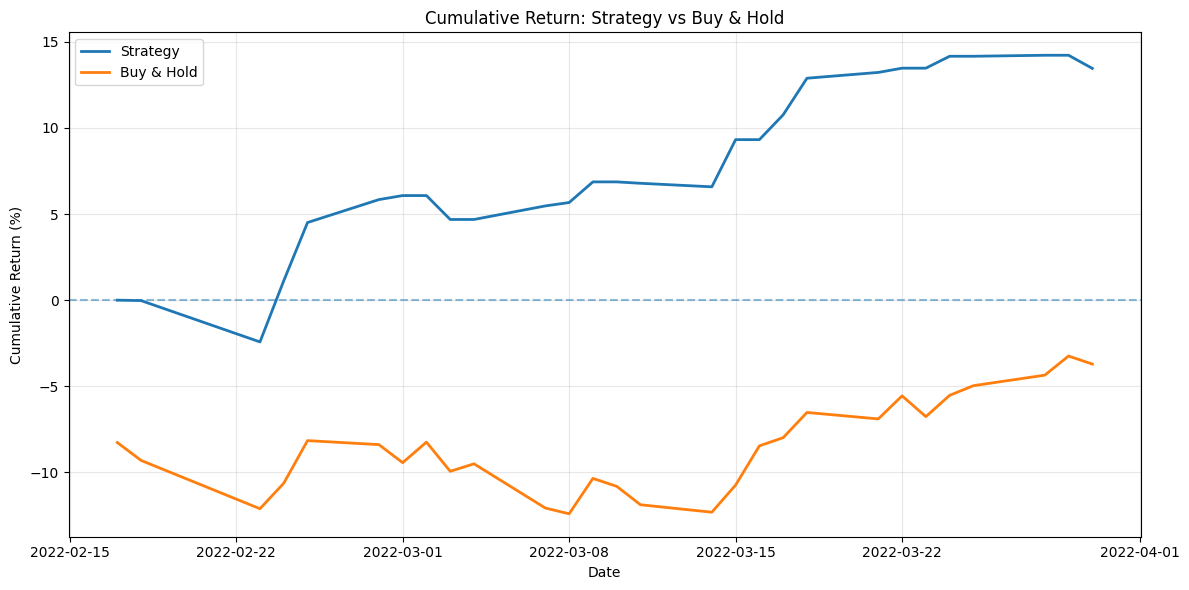


Realtime Chan + XGBoost Integrated Complete
Total test days: 28
Total completed trades: 42
Final strategy cumulative return: 13.46%
Final buy & hold cumulative return: -3.71%


In [12]:
#from realtime_chan_xgb_integrated import run_realtime_chan_xgb_integrated
from Common.CEnum import KL_TYPE

results = run_realtime_chan_xgb_integrated(
    csv_path="DataAPI/data/SPY_5M.csv",
    code="SPY",
    start_time="2022-01-01",
    end_time="2022-03-31",
    lv=KL_TYPE.K_5M,
    chan_window_size=500,
    train_days_for_model=30,
    threshold_days_for_selection=1,
    min_train_samples=100,
    min_valid_samples=20,
    initial_capital=100_000,
    position_size=1.0,
    transaction_fee_pct=0,
    output_dir="./output/chan_xgb_integrated",
    plot_results=True,
    verbose=True,
)

trades_df = results["trades_df"]
daily_df  = results["daily_results_df"]


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from datetime import timedelta

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sliding_window_chan import SlidingWindowChan
from ChanConfig import CChanConfig
from Common.CEnum import KL_TYPE, DATA_SRC, AUTYPE
from DataAPI.csvAPI import CSV_API  # ✅ NEW: we stream K-lines ourselves


# ============================================================
# 1. Labeling: BEST profit target within SAME DAY
# ============================================================

def calculate_profit_targets_best_window(
    bs_points_with_features: list,
    lookahead_days: float = 1.0,
) -> dict:
    """
    For each BSP, find the BEST reverse signal within a configurable time window.

    Parameters
    ----------
    bs_points_with_features : list[dict]
        BSP snapshots, each row must contain:
            - 'timestamp'
            - 'is_buy' (1 for buy, 0 for sell)
            - 'klu_idx'
            - 'klu_close'
    lookahead_days : float
        How many *calendar days* ahead to look for exits.
        - 1.0  => 24 hours (your "24h look period")
        - 0.5  => 12 hours
        - 2.0  => 48 hours, etc.

    Logic
    -----
    BUY BSP:
        - search later SELL BSPs with
              entry_ts < ts <= entry_ts + lookahead_days
        - choose EXIT with MAX klu_close (max profit)

    SELL BSP:
        - search later BUY BSPs within same time window
        - choose EXIT with MIN klu_close (max profit)

    If no reverse BSP within the window => has_profit_target = 0.
    """
    if not bs_points_with_features:
        return {}

    # --- normalize timestamps & sort ---
    enriched = []
    for row in bs_points_with_features:
        ts = row.get("timestamp")
        ts = pd.to_datetime(str(ts))
        new_row = dict(row)
        new_row["_ts"] = ts
        enriched.append(new_row)

    enriched.sort(key=lambda x: x["_ts"])

    profit_targets = {}
    n = len(enriched)

    for i in range(n):
        cur = enriched[i]
        entry_idx = cur["klu_idx"]
        entry_price = cur["klu_close"]
        is_buy = cur["is_buy"]
        entry_ts = cur["_ts"]

        horizon_ts = entry_ts + timedelta(days=lookahead_days)
        best_exit = None

        # scan forward within horizon
        for j in range(i + 1, n):
            future = enriched[j]
            future_ts = future["_ts"]

            # stop if beyond horizon
            if future_ts > horizon_ts:
                break

            # only reverse direction
            if future["is_buy"] == is_buy:
                continue

            if is_buy:
                # BUY -> want SELL with highest price
                if best_exit is None or future["klu_close"] > best_exit["klu_close"]:
                    best_exit = future
            else:
                # SELL -> want BUY with lowest price
                if best_exit is None or future["klu_close"] < best_exit["klu_close"]:
                    best_exit = future

        if best_exit is None:
            profit_targets[entry_idx] = {
                "profit_target_pct": None,
                "profit_target_distance": None,
                "has_profit_target": 0,
                "exit_type": None,
                "exit_klu_idx": None,
                "exit_price": None,
            }
            continue

        exit_price = best_exit["klu_close"]
        if is_buy:
            profit_pct = (exit_price - entry_price) / entry_price * 100.0
        else:
            profit_pct = (entry_price - exit_price) / entry_price * 100.0

        profit_targets[entry_idx] = {
            "profit_target_pct": profit_pct,
            "profit_target_distance": best_exit["klu_idx"] - entry_idx,
            "has_profit_target": 1,
            "exit_type": f"best_within_{lookahead_days}d",
            "exit_klu_idx": best_exit["klu_idx"],
            "exit_price": exit_price,
        }

    return profit_targets

# ============================================================
# 2. Dataset preparation (no future leak in FEATURES)
# ============================================================

def prepare_ml_dataset(df: pd.DataFrame) -> pd.DataFrame:
    """
    Prepare BSP dataset for ML:

    - Impute numeric & binary columns
    - Encode 'direction' as categorical if present
    - Replace inf with nan then 0
    """
    if df.empty:
        return df

    print("[🔧] Preparing ML dataset...")

    # Columns considered binary flags
    binary_cols = [
        col for col in df.columns
        if col.endswith(("_signal", "_oversold", "_overbought", "_positive", "_up", "_trend_up"))
    ]
    # extend explicit binary
    for col in ["is_buy", "is_bullish_candle", "has_profit_target"]:
        if col in df.columns:
            binary_cols.append(col)
    binary_cols = sorted(set(binary_cols))

    # numeric columns (excluding pure binary if you like, but it's ok to keep)
    numeric_cols = [
        col for col in df.select_dtypes(include=[np.number]).columns
        if col not in []  # (keep all numeric for now)
    ]

    # Impute numeric
    if numeric_cols:
        num_imputer = SimpleImputer(strategy="mean")
        df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

    # Impute binary (if exists)
    if binary_cols:
        existing_binary = [c for c in binary_cols if c in df.columns]
        if existing_binary:
            bin_imputer = SimpleImputer(strategy="most_frequent")
            df[existing_binary] = bin_imputer.fit_transform(df[existing_binary])

    # Categorical: only 'direction' here
    if "direction" in df.columns:
        df["direction"] = df["direction"].fillna("unknown").astype(str)
        le = LabelEncoder()
        df["direction_encoded"] = le.fit_transform(df["direction"])

    # Replace infinities then re-impute numeric as 0 on leftover nans
    df = df.replace([np.inf, -np.inf], np.nan)
    num_cols_final = df.select_dtypes(include=[np.number]).columns
    df[num_cols_final] = df[num_cols_final].fillna(0.0)

    print(f"[✅] Dataset prepared: {len(df)} samples, {len(df.columns)} columns")
    return df


# ============================================================
# 3. Feature selection & threshold optimization
# ============================================================

def get_feature_columns(df: pd.DataFrame, target_col: str = "profit_target_pct") -> list:
    """
    Choose feature columns from BSP dataset, excluding:
      - timestamps, IDs, explicit labels
      - exit_* fields, etc.
    """
    exclude_patterns = [
        "timestamp",
        "bsp_type",
        "snapshot_",
        "exit_",
        "klu_idx",
        "date",
    ]
    extra_exclude = [
        target_col,
        "profit_target_pct",
        "profit_target_distance",
        "has_profit_target",
        "price_change_pct",
        "direction",  # keep encoded version only
    ]
    cols = []
    for col in df.columns:
        if col in extra_exclude:
            continue
        if any(p in col for p in exclude_patterns):
            continue
        cols.append(col)
    # prefer encoded direction if available
    if "direction" in cols and "direction_encoded" in cols:
        cols.remove("direction")
    return sorted(cols)


def optimize_thresholds_with_fee(signals_df: pd.DataFrame,
                                 transaction_fee_pct: float,
                                 min_trades: int = 5) -> tuple:
    """
    Grid search thresholds using *realized* profit_target_pct
    (works only on past days with labels).

    We separate buy/sell BSPs, scan thresholds on predicted_profit_pct,
    and choose the pair that maximizes average net return after fees.
    """
    if len(signals_df) == 0:
        return 0.0, 0.0

    if "profit_target_pct" not in signals_df.columns:
        print("[⚠️] optimize_thresholds_with_fee: missing profit_target_pct, using 0/0 thresholds.")
        return 0.0, 0.0

    thresholds = np.linspace(-0.5, 3.0, 29)  # you can tune this range
    best_score = -1e9
    best_bt = 0.0
    best_st = 0.0
    roundtrip_fee_pct = 2 * transaction_fee_pct * 100.0

    buy_df = signals_df[signals_df["direction"] == "buy"]
    sell_df = signals_df[signals_df["direction"] == "sell"]

    for bt in thresholds:
        for st in thresholds:
            val_b = buy_df[buy_df["predicted_profit_pct"] >= bt]
            val_s = sell_df[sell_df["predicted_profit_pct"] >= st]

            n_b, n_s = len(val_b), len(val_s)
            tot = n_b + n_s
            if tot < min_trades:
                continue

            b_ret = (val_b["profit_target_pct"] - roundtrip_fee_pct).mean() if n_b > 0 else 0.0
            s_ret = (val_s["profit_target_pct"] - roundtrip_fee_pct).mean() if n_s > 0 else 0.0

            combined = (n_b * b_ret + n_s * s_ret) / tot

            if combined > best_score:
                best_score = combined
                best_bt = bt
                best_st = st

    return best_bt, best_st


# ============================================================
# 4. Per-day backtest (intraday BSP execution)
# ============================================================

def backtest_one_day_signals(signals_df: pd.DataFrame,
                             buy_threshold: float,
                             sell_threshold: float,
                             initial_capital: float,
                             position_size: float,
                             transaction_fee_pct: float,
                             verbose: bool = False):
    """
    Intraday backtest using BSP signals with predicted_profit_pct.

    Simple one-position strategy:
      - Only one position at a time.
      - BUY BSP opens, SELL BSP closes (if thresholds passed).
    """
    if len(signals_df) == 0:
        return {
            "final_value": initial_capital,
            "return_pct": 0.0,
            "trades": 0,
            "win_rate": 0.0,
            "signals": 0,
            "buy_signals": 0,
            "sell_signals": 0,
        }, []

    df = signals_df.sort_values("timestamp").reset_index(drop=True)

    cash = initial_capital
    shares = 0.0
    entry_price = None
    entry_time = None
    trades = []
    per_side_fee = transaction_fee_pct

    def open_position(price, time_):
        nonlocal cash, shares, entry_price, entry_time
        trade_cap = cash * position_size
        if trade_cap <= 0:
            return False
        effective_capital = trade_cap * (1 - per_side_fee)
        shares = effective_capital / price
        cash -= trade_cap
        entry_price = price
        entry_time = time_
        trades.append({
            "entry_time": time_,
            "entry_price": price,
            "direction": "buy",
        })
        if verbose:
            print(f"[TRADE] BUY at {time_} | price = {price:.4f}")
        return True

    def close_position(price, time_):
        nonlocal cash, shares, entry_price, entry_time
        if shares <= 0:
            return
        gross_exit = shares * price
        net_exit = gross_exit * (1 - per_side_fee)
        trade_cap = shares * entry_price if entry_price is not None else 0.0
        pnl = net_exit - trade_cap
        ret_pct = (pnl / trade_cap * 100) if trade_cap > 0 else 0.0
        cash += net_exit
        if trades:
            trades[-1].update({
                "exit_time": time_,
                "exit_price": price,
                "pnl": pnl,
                "return_pct": ret_pct,
            })
        if verbose:
            print(
                f"[TRADE] SELL at {time_} | price = {price:.4f} | "
                f"trade return = {ret_pct:.2f}%"
            )
        shares = 0.0
        entry_price = None
        entry_time = None

    for _, row in df.iterrows():
        ts = row["timestamp"]
        price = row["klu_close"]
        pred = row["predicted_profit_pct"]
        direction = row["direction"]

        if direction == "buy":
            if shares == 0 and pred >= buy_threshold:
                open_position(price, ts)
        elif direction == "sell":
            if shares > 0 and pred >= sell_threshold:
                close_position(price, ts)

    if shares > 0:
        last_row = df.iloc[-1]
        close_position(last_row["klu_close"], last_row["timestamp"])

    final_value = cash
    ret_pct = (final_value / initial_capital - 1) * 100 if initial_capital > 0 else 0.0
    completed = [t for t in trades if "exit_price" in t]
    win_trades = [t for t in completed if t.get("return_pct", 0) > 0]
    win_rate = (len(win_trades) / len(completed) * 100) if completed else 0.0

    buy_signals = (df["direction"] == "buy").sum()
    sell_signals = (df["direction"] == "sell").sum()

    result = {
        "final_value": final_value,
        "return_pct": ret_pct,
        "trades": len(completed),
        "win_rate": win_rate,
        "signals": len(df),
        "buy_signals": buy_signals,
        "sell_signals": sell_signals,
    }
    if verbose:
        print(
            f"    Day summary: trades={len(completed)}, "
            f"win_rate={win_rate:.1f}%, day_return={ret_pct:.2f}%"
        )
    return result, trades


# ============================================================
# 5. Buy & Hold benchmark
# ============================================================

def calc_buy_hold_daily(csv_path: str,
                        start_time: str,
                        end_time: str) -> pd.DataFrame:
    """
    Compute daily open/close and cumulative return for Buy&Hold from raw kline CSV.
    """
    raw = pd.read_csv(csv_path)

    # Detect timestamp column
    if "timestamp" in raw.columns:
        raw["timestamp"] = pd.to_datetime(raw["timestamp"], errors="coerce")
    else:
        first_col = raw.columns[0]
        raw["timestamp"] = pd.to_datetime(raw[first_col], errors="coerce")

    raw = raw.dropna(subset=["timestamp"])

    # Detect close column
    close_col = None
    for c in ["close", "Close", "adj_close", "Adj Close", "AdjClose"]:
        if c in raw.columns:
            close_col = c
            break
    if close_col is None:
        # fallback: any column ending with 'close'
        for c in raw.columns:
            if c.lower().endswith("close"):
                close_col = c
                break
    if close_col is None:
        raise ValueError("Could not find a close column in CSV.")

    mask = (raw["timestamp"] >= pd.to_datetime(start_time)) & (raw["timestamp"] <= pd.to_datetime(end_time))
    raw = raw[mask].copy()

    raw["date"] = raw["timestamp"].dt.date
    daily = raw.groupby("date")[close_col].agg(["first", "last"])
    if daily.empty:
        return pd.DataFrame(columns=["date", "open", "close", "return_pct", "cum_return_pct"])

    daily.rename(columns={"first": "open", "last": "close"}, inplace=True)
    daily["return_pct"] = (daily["close"] / daily["open"] - 1) * 100.0
    first_price = daily["open"].iloc[0]
    daily["cum_return_pct"] = (daily["close"] / first_price - 1) * 100.0

    return daily.reset_index().rename(columns={"date": "date"})

def _build_dataset_from_snapshots(
    all_bsp_snapshots: list,
    label_lookahead_days: float = 1.0,   # ✅ new parameter
) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    From the accumulated BSP snapshots (up to 'now'), compute:
      - best profit labels within a configurable time window
      - a full BSP DataFrame (bsp_df)
      - a labeled subset (bsp_valid: has_profit_target == 1)

    label_lookahead_days controls how far we look for exits (24h, 48h, etc.).
    """
    if not all_bsp_snapshots:
        return pd.DataFrame(), pd.DataFrame()

    # 1) Label with best exits within N-day horizon
    profit_targets = calculate_profit_targets_best_window(
        all_bsp_snapshots,
        lookahead_days=label_lookahead_days,
    )
    for row in all_bsp_snapshots:
        idx = row["klu_idx"]
        if idx in profit_targets:
            row.update(profit_targets[idx])
        else:
            row["profit_target_pct"] = None
            row["profit_target_distance"] = None
            row["has_profit_target"] = 0
            row["exit_type"] = None
            row["exit_klu_idx"] = None
            row["exit_price"] = None

    # 2) Build DataFrame & time columns (same as before)
    bsp_df_raw = (
        pd.DataFrame(all_bsp_snapshots)
        .sort_values("klu_idx")
        .reset_index(drop=True)
    )
    bsp_df_raw["timestamp"] = bsp_df_raw["timestamp"].apply(
        lambda t: pd.to_datetime(str(t))
    )
    bsp_df_raw["date"] = bsp_df_raw["timestamp"].dt.date

    # 3) Prepare ML dataset
    bsp_df = prepare_ml_dataset(bsp_df_raw.copy())

    # 4) Labeled subset
    if "has_profit_target" in bsp_df.columns:
        bsp_valid = (
            bsp_df[bsp_df["has_profit_target"] == 1]
            .copy()
            .sort_values("timestamp")
        )
    else:
        bsp_valid = pd.DataFrame()

    return bsp_df, bsp_valid


# ============================================================
# 6. Main: ONLINE-style walk-forward with 2-month warm-up
#     (now feeding K-lines into SlidingWindowChan.process_new_kline)
# ============================================================

def run_realtime_chan_xgb_same_day_online(
    csv_path: str,
    code: str = "SPY",
    start_time: str = "2022-01-01",
    end_time: str = "2022-03-31",
    lv: KL_TYPE = KL_TYPE.K_5M,
    chan_window_size: int = 1000,
    warmup_trading_days: int = 40,          # ≈2 months
    threshold_days_for_selection: int = 3,  # last N days for threshold tuning
    min_train_samples: int = 100,
    min_valid_samples: int = 20,
    initial_capital: float = 100_000.0,
    position_size: float = 1.0,
    transaction_fee_pct: float = 0.001,
    output_dir: str = "./output/chan_xgb_online",
    plot_results: bool = True,
    verbose: bool = True,
    xgb_train_days: int | None = None,
    label_lookahead_days: float = 1.0,
):
    """
    ONE-PASS version:

    - Stream K-lines from CSV_API.
    - Feed every K-line into SlidingWindowChan.process_new_kline().
    - Accumulate BSP snapshots in all_bsp_snapshots.
    - At each *day boundary*:
        - Build dataset from all BSP up to that day (no future days involved).
        - Train XGBoost on PREVIOUS labeled days (respecting warm-up).
        - Tune thresholds on last N training days.
        - Backtest the just-finished day using the models and thresholds.

    So Chan + XGBoost + backtest are interleaved per day, not in separate phases.
    """
    os.makedirs(output_dir, exist_ok=True)

    print("=" * 80)
    print("Realtime Chan + XGBoost (ONLINE style, day-by-day interleaved)")
    print("=" * 80)
    print(f"Code: {code}")
    print(f"Period: {start_time} → {end_time}")
    print(f"Warm-up trading days (no trading): {warmup_trading_days}")
    print(f"Initial capital: {initial_capital}, Position size: {position_size*100:.0f}%")
    print(f"Transaction fee per side: {transaction_fee_pct*100:.3f}%")
    print("=" * 80)

    # ---------------- Chan config & SlidingWindowChan ----------------
    config = CChanConfig({
        "cal_demark": True,
        "cal_kdj": True,
        "cal_dmi": True,
        "cal_rsi": True,
        "cal_rsl": True,
        "cal_demand_index": True,
        "cal_adline": True,
        "cal_bb_vals": True,
        "cal_kc_vals": True,
        "cal_starc_vals": True,
        "bi_strict": True,
        "trigger_step": True,
        "skip_step": 0,
        "divergence_rate": float("inf"),
        "bsp2_follow_1": True,
        "bsp3_follow_1": False,
        "min_zs_cnt": 0,
        "bs1_peak": False,
        "macd_algo": "peak",
        "bs_type": "1,2,3a,1p,2s,3b",
        "print_warning": False,
        "zs_algo": "normal",
    })

    chan = SlidingWindowChan(
        code=code,
        begin_time=None,       # we stream manually
        end_time=None,
        data_src=None,         # not using internal loader
        lv_list=[lv],
        config=config,
        autype=AUTYPE.QFQ,
        max_klines=chan_window_size,
    )

    # ---------------- Stream K-lines from CSV_API ----------------
    csv_api = CSV_API(
        code=code,
        k_type=lv,
        begin_date=start_time,
        end_date=end_time,
        autype=AUTYPE.QFQ,
    )

    from datetime import datetime as _dt

    all_bsp_snapshots = []   # all BSP snapshots up to "now"
    daily_results = []       # result per test day
    all_trades = []          # all trades from all test days

    current_day = None
    last_ts = None
    last_price = None

    # To compute Buy&Hold later
    all_dates_seen = set()

    # ------------- inner helper: finalize a completed day -------------
    def finalize_day(finished_day, all_bsp_snapshots_local):
        """
        Called when we've just finished streaming all K-lines for `finished_day`.
        We:
          - build dataset from all BSP up to this moment,
          - decide if we can train,
          - if yes, train XGBoost and backtest this finished_day.
        """
        nonlocal daily_results, all_trades

        print(f"\n{'-'*60}")
        print(f"[DAY DONE] {finished_day} – building dataset & training...")

        bsp_df, bsp_valid = _build_dataset_from_snapshots(
            all_bsp_snapshots_local,
            label_lookahead_days=label_lookahead_days,   # <== 记得传参
        )

        labeled_days = np.sort(bsp_valid["date"].unique())
        if bsp_df.empty or bsp_valid.empty:
            if verbose:
                print("    [Info] No labeled BSPs yet, skipping this day.")
            return bsp_df  # still return last snapshot of dataset

        # unique labeled days up to now
        labeled_days = np.sort(bsp_valid["date"].unique())
        if finished_day not in labeled_days:
            if verbose:
                print("    [Info] No labeled BSPs for this day itself, skipping.")
            return bsp_df

        # training days must be strictly BEFORE finished_day
                # training days must be strictly BEFORE finished_day
        all_prior_days = [d for d in labeled_days if d < finished_day]

        # Warm-up：必须先有足够「prior days」
        if len(all_prior_days) < warmup_trading_days:
            if verbose:
                print(
                    f"    [Warmup] Only {len(all_prior_days)} training days "
                    f"(< {warmup_trading_days}). No trading on {finished_day}."
                )
            return bsp_df

        # 如果设置了 xgb_train_days，就从 all_prior_days 里截取最近这几天作为「可用样本池」
        if xgb_train_days is not None and len(all_prior_days) > xgb_train_days:
            candidate_days = all_prior_days[-xgb_train_days:]
        else:
            candidate_days = all_prior_days

        # 从 candidate_days 的最后 N 天拿出来做 threshold days
        if len(candidate_days) <= threshold_days_for_selection:
            thr_days = candidate_days[:]          # 全部拿去做 threshold
            train_days = []                      # 剩下的训练天为空
        else:
            thr_days = candidate_days[-threshold_days_for_selection:]
            train_days = candidate_days[:-threshold_days_for_selection]

        if verbose:
            print(f"    Candidate days: {candidate_days[0]} → {candidate_days[-1]} ({len(candidate_days)})")
            if train_days:
                print(f"    Train days:    {train_days[0]} → {train_days[-1]} ({len(train_days)})")
            else:
                print(f"    Train days:    [NONE; all used as threshold days]")
            print(f"    Threshold days:{thr_days[0]} → {thr_days[-1]} ({len(thr_days)})")

        # 如果阈值天被剔除后，没有训练天了，就没法训练模型，直接跳过这个 test day
        if len(train_days) == 0:
            if verbose:
                print("    [Skip] No remaining train days after excluding threshold days.")
            return bsp_df
        train_df = bsp_valid[bsp_valid["date"].isin(train_days)].copy()
        thr_df = bsp_valid[bsp_valid["date"].isin(thr_days)].copy()
        test_df = bsp_df[bsp_df["date"] == finished_day].copy()  # BSPs of the finished day

        if len(train_df) < min_train_samples or len(thr_df) < min_valid_samples:
            if verbose:
                print("    [Skip] Not enough samples for train/threshold.")
            return bsp_df

        train_buy = train_df[train_df["direction"] == "buy"]
        train_sell = train_df[train_df["direction"] == "sell"]
        if len(train_buy) < 10 or len(train_sell) < 10:
            if verbose:
                print("    [Skip] Not enough buy/sell samples.")
            return bsp_df

        feature_cols = get_feature_columns(train_df, target_col="profit_target_pct")
        if verbose:
            print(f"    [🧬] Using {len(feature_cols)} feature columns.")

        X_train_buy = train_buy[feature_cols].values
        y_train_buy = train_buy["profit_target_pct"].values
        X_train_sell = train_sell[feature_cols].values
        y_train_sell = train_sell["profit_target_pct"].values

        params = {
            "max_depth": 6,
            "learning_rate": 0.1,
            "n_estimators": 150,
            "subsample": 0.9,
            "colsample_bytree": 0.9,
            "random_state": 42,
        }
        buy_model = xgb.XGBRegressor(**params)
        sell_model = xgb.XGBRegressor(**params)

        buy_model.fit(X_train_buy, y_train_buy)
        sell_model.fit(X_train_sell, y_train_sell)

        print(
            f"[MODEL] {finished_day} | XGBoost trained on "
            f"buy={len(train_buy)} / sell={len(train_sell)} samples"
        )

        # Threshold tuning on past days
        thr_buy = thr_df[thr_df["direction"] == "buy"].copy()
        thr_sell = thr_df[thr_df["direction"] == "sell"].copy()
        if len(thr_buy) > 0:
            thr_buy["predicted_profit_pct"] = buy_model.predict(thr_buy[feature_cols].values)
        if len(thr_sell) > 0:
            thr_sell["predicted_profit_pct"] = sell_model.predict(thr_sell[feature_cols].values)
        thr_signals = pd.concat([thr_buy, thr_sell], ignore_index=True)

        buy_th, sell_th = optimize_thresholds_with_fee(
            thr_signals,
            transaction_fee_pct=transaction_fee_pct,
            min_trades=5,
        )
        if verbose:
            print(f"    [Thresholds] Buy={buy_th:.2f}%, Sell={sell_th:.2f}%")

        # Backtest the finished day using only that day's BSPs
        test_buy = test_df[test_df["direction"] == "buy"].copy()
        test_sell = test_df[test_df["direction"] == "sell"].copy()
        if len(test_buy) > 0:
            test_buy["predicted_profit_pct"] = buy_model.predict(test_buy[feature_cols].values)
        if len(test_sell) > 0:
            test_sell["predicted_profit_pct"] = sell_model.predict(test_sell[feature_cols].values)
        test_signals = pd.concat([test_buy, test_sell], ignore_index=True)

        if len(test_signals) == 0:
            if verbose:
                print("    [Info] No BSP signals on test day.")
            return bsp_df

        bt_res, trades = backtest_one_day_signals(
            test_signals,
            buy_threshold=buy_th,
            sell_threshold=sell_th,
            initial_capital=initial_capital,
            position_size=position_size,
            transaction_fee_pct=transaction_fee_pct,
            verbose=verbose,
        )

        for t in trades:
            t["test_date"] = finished_day
        all_trades.extend(trades)

        daily_results.append({
            "date": finished_day,
            "train_start": train_days[0],
            "train_end": train_days[-1],
            "strategy_return": bt_res["return_pct"],
            "signals": bt_res["signals"],
            "trades": bt_res["trades"],
            "win_rate": bt_res["win_rate"],
            "buy_threshold": buy_th,
            "sell_threshold": sell_th,
        })

        return bsp_df  # return last dataset snapshot for final export

    # ---------------- main streaming loop ----------------
    print("[🧪] Streaming K-lines into SlidingWindowChan and training per day...")
    from datetime import datetime as _dt
    last_log = _dt.now()
    bsp_df_final = pd.DataFrame()  # last snapshot, for return / CSV

    for klu_idx, klu in enumerate(csv_api.get_kl_data()):
        # basic metadata for Chan
        klu.kl_type = lv
        klu.set_idx(klu_idx)

        raw_ts = klu.time
        ts = pd.to_datetime(str(raw_ts))  # ✅ always via string
        d = ts.date()
        all_dates_seen.add(d)

        # Day rollover?
        if current_day is None:
            current_day = d
        elif d != current_day:
            # We've just finished current_day
            bsp_df_final = finalize_day(current_day, all_bsp_snapshots)
            current_day = d  # start new day

        # Process this K-line through Chan
        window_chan, new_bsp_list = chan.process_new_kline(klu)

        # Accumulate BSP snapshots
        if new_bsp_list:
            all_bsp_snapshots.extend(new_bsp_list)

        # For logging
        now = _dt.now()
        if klu_idx % 500 == 0 or (now - last_log).total_seconds() > 5:
            stats = chan.get_stats()
            print(
                f"[📈] K-line {klu_idx}: unique BSP={stats['unique_bsp_count']}, "
                f"window_start={stats['window_start_idx']}, "
                f"window_size={stats['current_window_size']}"
            )
            last_log = now

        last_ts = ts
        last_price = klu.close

    # After loop: finalize the last day
    if current_day is not None and all_bsp_snapshots:
        bsp_df_final = finalize_day(current_day, all_bsp_snapshots)

    # ---------------- Build daily_results_df & benchmark ----------------
    if len(daily_results) == 0:
        print("[❌] No valid daily trading results (warm-up might be too long).")
        return {
            "daily_results_df": pd.DataFrame(),
            "trades_df": pd.DataFrame(),
            "bsp_df": bsp_df_final,
            "bh_df": pd.DataFrame(),
        }

    daily_results_df = (
        pd.DataFrame(daily_results)
        .sort_values("date")
        .reset_index(drop=True)
    )

    # Buy & Hold benchmark (full period)
    bh_df = calc_buy_hold_daily(csv_path, start_time, end_time)

    if not bh_df.empty:
        # Map original buy&hold cumulative returns to the test days
        bh_map = bh_df.set_index("date")["cum_return_pct"].to_dict()
        daily_results_df["buy_hold_cum_return"] = daily_results_df["date"].map(bh_map)
    else:
        daily_results_df["buy_hold_cum_return"] = np.nan

    # Strategy cumulative return (unchanged formula)
    daily_results_df["strategy_cum_return"] = (
        1 + daily_results_df["strategy_return"] / 100.0
    ).cumprod() * 100.0 - 100.0

    # 🔁 Rebase BOTH curves so the first test day is 0%
    if not daily_results_df.empty:
        # Strategy
        first_strat = daily_results_df["strategy_cum_return"].iloc[0]
        daily_results_df["strategy_cum_return"] = (
            daily_results_df["strategy_cum_return"] - first_strat
        )

        # Buy & Hold (only if it exists)
        if daily_results_df["buy_hold_cum_return"].notna().any():
            first_bh = daily_results_df["buy_hold_cum_return"].dropna().iloc[0]
            daily_results_df["buy_hold_cum_return"] = (
                daily_results_df["buy_hold_cum_return"] - first_bh
            )


    # Plot
    if plot_results and not daily_results_df.empty:
        plt.figure(figsize=(12, 6))
        dates = pd.to_datetime(daily_results_df["date"])
        plt.plot(dates, daily_results_df["strategy_cum_return"], label="Strategy", linewidth=2)
        if "buy_hold_cum_return" in daily_results_df.columns:
            plt.plot(dates, daily_results_df["buy_hold_cum_return"], label="Buy & Hold", linewidth=2)
        plt.axhline(0, linestyle="--", alpha=0.5)
        plt.title("Cumulative Return: Strategy vs Buy & Hold")
        plt.xlabel("Date")
        plt.ylabel("Cumulative Return (%)")
        plt.grid(alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()

    trades_df = pd.DataFrame(all_trades)

    if verbose:
        print("\n" + "=" * 80)
        print("Realtime Chan + XGBoost (ONLINE style, day-by-day) Complete")
        print("=" * 80)
        print(f"Total test days: {len(daily_results_df)}")
        print(f"Total completed trades: {len(trades_df)}")
        if "strategy_cum_return" in daily_results_df.columns:
            print(f"Final strategy cumulative return: "
                  f"{daily_results_df['strategy_cum_return'].iloc[-1]:.2f}%")
        if "buy_hold_cum_return" in daily_results_df.columns:
            print(f"Final buy & hold cumulative return: "
                  f"{daily_results_df['buy_hold_cum_return'].iloc[-1]:.2f}%")
        print("=" * 80)

    # Save CSVs
    daily_results_df.to_csv(os.path.join(output_dir, "daily_results_online.csv"), index=False)
    trades_df.to_csv(os.path.join(output_dir, "trades_online.csv"), index=False)
    if not bsp_df_final.empty:
        bsp_df_final.to_csv(os.path.join(output_dir, "bsp_dataset_used_online.csv"), index=False)

    return {
        "daily_results_df": daily_results_df,
        "trades_df": trades_df,
        "bsp_df": bsp_df_final,
        "bh_df": bh_df,
    }



if __name__ == "__main__":
    from Common.CEnum import KL_TYPE

    results = run_realtime_chan_xgb_same_day_online(
        csv_path="DataAPI/data/SPY_5M.csv",
        code="SPY",
        start_time="2022-01-01",
        end_time="2022-03-30",
        lv=KL_TYPE.K_5M,
        chan_window_size=500,
        warmup_trading_days=30,
        threshold_days_for_selection=3,
        min_train_samples=100,
        min_valid_samples=20,
        initial_capital=100_000,
        position_size=1.0,
        transaction_fee_pct=0,
        output_dir="./output/chan_xgb_online",
        plot_results=True,
        verbose=True,
        xgb_train_days=30,
        label_lookahead_days=2.0,
    )

    trades_df = results["trades_df"]
    daily_df = results["daily_results_df"]
    print(trades_df.head())
    print(daily_df.head())


Realtime Chan + XGBoost (ONLINE style, day-by-day interleaved)
Code: SPY
Period: 2022-01-01 → 2022-03-30
Warm-up trading days (no trading): 30
Initial capital: 100000, Position size: 100%
Transaction fee per side: 0.000%
[🧪] Streaming K-lines into SlidingWindowChan and training per day...
[📈] K-line 0: unique BSP=0, window_start=0, window_size=1

------------------------------------------------------------
[DAY DONE] 2022-01-03 – building dataset & training...


KeyError: 'date'